In [1]:
import numpy as np
import scanpy as sc
import pandas as pd
import anndata as ad
import igraph
import leidenalg
import matplotlib.pyplot as plt

In [2]:
import warnings 
warnings.filterwarnings('ignore')
sc.settings.verbosity = 0 

In [3]:
import math

import plotly.graph_objects as go
import plotly.express
from matplotlib.pyplot import figure

!pip install adjustText
from adjustText import adjust_text

In [4]:
!pip install loompy

In [5]:
liver_ss3 = ad.read_loom("/Users/tgrxj/Desktop/Internship/Dana_dataset/Dana_dataset/ss3_full.loom",
                         sparse = True,
                         obs_names = 'cell names',
                         var_names = 'gene names',
                        )

In [6]:
 liver_ss3 

AnnData object with n_obs × n_vars = 5251 × 56941
    obs: 'CellID'
    var: 'Accession', 'Chromosome', 'End', 'Gene', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [7]:
bc = pd.read_table("/Users/tgrxj/Desktop/Internship/Dana_dataset/Dana_dataset/Barcodes_NexteraLCL_Indexing.txt",
                   delimiter = '\t')
bc

N7XX        N5XX      Index1      Index2                    XC  \
0       ATAGGCGCTC  TTGGTACGCG  GAGCGCCTAT  CGCGTACCAA  GAGCGCCTATCGCGTACCAA   
1       TACAACCTCA  TTGGTACGCG  TGAGGTTGTA  CGCGTACCAA  TGAGGTTGTACGCGTACCAA   
2       AGTTATCGGA  TTGGTACGCG  TCCGATAACT  CGCGTACCAA  TCCGATAACTCGCGTACCAA   
3       AGGAGCTTCC  TTGGTACGCG  GGAAGCTCCT  CGCGTACCAA  GGAAGCTCCTCGCGTACCAA   
4       CATGCTGTTA  TTGGTACGCG  TAACAGCATG  CGCGTACCAA  TAACAGCATGCGCGTACCAA   
...            ...         ...         ...         ...                   ...   
147451  TTACCTCCTA  GTTCCTCTAA  TAGGAGGTAA  TTAGAGGAAC  TAGGAGGTAATTAGAGGAAC   
147452  GATTCTCGAA  GTTCCTCTAA  TTCGAGAATC  TTAGAGGAAC  TTCGAGAATCTTAGAGGAAC   
147453  CTTAAGTGAC  GTTCCTCTAA  GTCACTTAAG  TTAGAGGAAC  GTCACTTAAGTTAGAGGAAC   
147454  GTAGATGGTA  GTTCCTCTAA  TACCATCTAC  TTAGAGGAAC  TACCATCTACTTAGAGGAAC   
147455  CAAGTTGTCA  GTTCCTCTAA  TGACAACTTG  TTAGAGGAAC  TGACAACTTGTTAGAGGAAC   

                  XC_NovaSeq i7loc i7row  i7col i5loc i5row  i5col BCset  \
0       GAGCGCCTATTTGGTACGCG    A1     A      1    A1     A      1    1A   
1       TGAGGTTGTATTGGTACGCG    B1     B      1    A1     A      1    1B   
2       TCCGATAACTTTGGTACGCG    C1     C      1    A1     A      1    1C   
3       GGAAGCTCCTTTGGTACGCG    D1     D      1    A1     A      1    1D   
4       TAACAGCATGTTGGTACGCG    E1     E      1    A1     A      1    1E   
...                      ...   ...   ...    ...   ...   ...    ...   ...   
147451  TAGGAGGTAAGTTCCTCTAA   L24     L     24   P24     P     24   24L   
147452  TTCGAGAATCGTTCCTCTAA   M24     M     24   P24     P     24   24M   
147453  GTCACTTAAGGTTCCTCTAA   N24     N     24   P24     P     24   24N   
147454  TACCATCTACGTTCCTCTAA   O24     O     24   P24     P     24   24O   
147455  TGACAACTTGGTTCCTCTAA   P24     P     24   P24     P     24   24P   

       WellID              XC_DNBPE  
0          A1  CGCGTACCAAATAGGCGCTC  
1          A1  CGCGTACCAATACAACCTCA  
2          A1  CGCGTACCAAAGTTATCGGA  
3          A1  CGCGTACCAAAGGAGCTTCC  
4          A1  CGCGTACCAACATGCTGTTA  
...       ...                   ...  
147451    P24  TTAGAGGAACTTACCTCCTA  
147452    P24  TTAGAGGAACGATTCTCGAA  
147453    P24  TTAGAGGAACCTTAAGTGAC  
147454    P24  TTAGAGGAACGTAGATGGTA  
147455    P24  TTAGAGGAACCAAGTTGTCA  

[147456 rows x 15 columns]

In [19]:
plates = pd.read_excel("/Users/tgrxj/Desktop/Internship/Dana_dataset/Dana_dataset/plates_xpress_swati.xlsx")
plates

Plate Index    Age     Sex  Replicate    PlateN
0          SP_1_p1   12L    Old  Female          1        p1
1          SP_1_p2   18M    Old  Female          1        p2
2          SP_1_p3   20P    Old  Female          1        p3
3          SP_2_p1    4M    Old  Female          2        p1
4          SP_2_p2   14J    Old  Female          2        p2
5          SP_2_p3   10K    Old  Female          2        p3
6   SampleB_150322    8D    Old    Male          1  Nucleip1
7          SP_3_p1   22N    Old    Male          1        p1
8          SP_3_p2    3B    Old    Male          1        p2
9          SP_3_p3    3A    Old    Male          1        p3
10         SP_3_p4   11H    Old    Male          1        p4
11  SampleC_150322    2E    Old    Male          2  Nucleip2
12         SP_4_p1   23L    Old    Male          2        p1
13         SP_4_p2   19I    Old    Male          2        p2
14         SP_4_p3   10D    Old    Male          2        p3
15           SP_34    7E    Old    Male          2        p4
16      SP_Y_F1_p1   22P  Young  Female          1        p1
17      SP_Y_F1_p2    4D  Young  Female          1        p2
18      SP_Y_F1_p3    7B  Young  Female          1        p3
19      SP_Y_F2_p1   18K  Young  Female          2        p1
20      SP_Y_F2_p2    2O  Young  Female          2        p2
21      SP_Y_F2_p3   18I  Young  Female          2        p3
22  SampleA_150322   13F  Young    Male          1  Nucleip1
23      SP_Y_M1_p1   16O  Young    Male          1        p1
24      SP_Y_M1_p2   10G  Young    Male          1        p2
25      SP_Y_M1_p3   22B  Young    Male          1        p3
26  SampleD_150322   11I  Young    Male          2  Nucleip2
27      SP_Y_M2_p1   14M  Young    Male          2        p1
28      SP_Y_M2_p2   19J  Young    Male          2        p2
29      SP_Y_M2_p3    9C  Young    Male          2        p3

In [8]:
liver_ss3.obs

CellID
0     ss3_full:AACTGCGGAGCCATAGGTATx
1     ss3_full:AACTGCGGAGTAAGTGCTCGx
2     ss3_full:AACGTACCGTTGCCTACGTCx
3     ss3_full:AAGCGCCGAGCGATGACCTTx
4     ss3_full:AACTGCGGAGCAGCCACAAGx
...                              ...
5246  ss3_full:TTGTGGTTCGTTGCTCTAACx
5247  ss3_full:TTGTTACTCCAAGCCTGTTAx
5248  ss3_full:TTGTTACTCCCCTCAGAATAx
5249  ss3_full:TTGTTCGGATAAGCCTGTTAx
5250  ss3_full:TTGTTACTCCTAGCCACTTGx

[5251 rows x 1 columns]

In [9]:
cellid = liver_ss3.obs
cellid = cellid.replace(to_replace = 'ss3_full:' , value = '', regex = True)
cellid = cellid.replace(to_replace = 'x' , value = '', regex = True)

In [10]:
cellid

CellID
0     AACTGCGGAGCCATAGGTAT
1     AACTGCGGAGTAAGTGCTCG
2     AACGTACCGTTGCCTACGTC
3     AAGCGCCGAGCGATGACCTT
4     AACTGCGGAGCAGCCACAAG
...                    ...
5246  TTGTGGTTCGTTGCTCTAAC
5247  TTGTTACTCCAAGCCTGTTA
5248  TTGTTACTCCCCTCAGAATA
5249  TTGTTCGGATAAGCCTGTTA
5250  TTGTTACTCCTAGCCACTTG

[5251 rows x 1 columns]

In [11]:
liver_ss3.obs['cellid'] = cellid
liver_ss3.obs

CellID                cellid
0     ss3_full:AACTGCGGAGCCATAGGTATx  AACTGCGGAGCCATAGGTAT
1     ss3_full:AACTGCGGAGTAAGTGCTCGx  AACTGCGGAGTAAGTGCTCG
2     ss3_full:AACGTACCGTTGCCTACGTCx  AACGTACCGTTGCCTACGTC
3     ss3_full:AAGCGCCGAGCGATGACCTTx  AAGCGCCGAGCGATGACCTT
4     ss3_full:AACTGCGGAGCAGCCACAAGx  AACTGCGGAGCAGCCACAAG
...                              ...                   ...
5246  ss3_full:TTGTGGTTCGTTGCTCTAACx  TTGTGGTTCGTTGCTCTAAC
5247  ss3_full:TTGTTACTCCAAGCCTGTTAx  TTGTTACTCCAAGCCTGTTA
5248  ss3_full:TTGTTACTCCCCTCAGAATAx  TTGTTACTCCCCTCAGAATA
5249  ss3_full:TTGTTCGGATAAGCCTGTTAx  TTGTTCGGATAAGCCTGTTA
5250  ss3_full:TTGTTACTCCTAGCCACTTGx  TTGTTACTCCTAGCCACTTG

[5251 rows x 2 columns]

In [12]:
# check if cellID and XC column are corresponding
# this operation only considers unique values, removing the duplicates
join_cellid = list(set(cellid.loc[:,'CellID']).intersection(bc.loc[:,'XC']))
len(join_cellid)

4993

In [17]:
# rename the BCset to INdex to merge the information between bc and plates
bc = bc.rename(columns = {'BCset':'Index'})
bc

N7XX        N5XX      Index1      Index2                    XC  \
0       ATAGGCGCTC  TTGGTACGCG  GAGCGCCTAT  CGCGTACCAA  GAGCGCCTATCGCGTACCAA   
1       TACAACCTCA  TTGGTACGCG  TGAGGTTGTA  CGCGTACCAA  TGAGGTTGTACGCGTACCAA   
2       AGTTATCGGA  TTGGTACGCG  TCCGATAACT  CGCGTACCAA  TCCGATAACTCGCGTACCAA   
3       AGGAGCTTCC  TTGGTACGCG  GGAAGCTCCT  CGCGTACCAA  GGAAGCTCCTCGCGTACCAA   
4       CATGCTGTTA  TTGGTACGCG  TAACAGCATG  CGCGTACCAA  TAACAGCATGCGCGTACCAA   
...            ...         ...         ...         ...                   ...   
147451  TTACCTCCTA  GTTCCTCTAA  TAGGAGGTAA  TTAGAGGAAC  TAGGAGGTAATTAGAGGAAC   
147452  GATTCTCGAA  GTTCCTCTAA  TTCGAGAATC  TTAGAGGAAC  TTCGAGAATCTTAGAGGAAC   
147453  CTTAAGTGAC  GTTCCTCTAA  GTCACTTAAG  TTAGAGGAAC  GTCACTTAAGTTAGAGGAAC   
147454  GTAGATGGTA  GTTCCTCTAA  TACCATCTAC  TTAGAGGAAC  TACCATCTACTTAGAGGAAC   
147455  CAAGTTGTCA  GTTCCTCTAA  TGACAACTTG  TTAGAGGAAC  TGACAACTTGTTAGAGGAAC   

                  XC_NovaSeq i7loc i7row  i7col i5loc i5row  i5col Index  \
0       GAGCGCCTATTTGGTACGCG    A1     A      1    A1     A      1    1A   
1       TGAGGTTGTATTGGTACGCG    B1     B      1    A1     A      1    1B   
2       TCCGATAACTTTGGTACGCG    C1     C      1    A1     A      1    1C   
3       GGAAGCTCCTTTGGTACGCG    D1     D      1    A1     A      1    1D   
4       TAACAGCATGTTGGTACGCG    E1     E      1    A1     A      1    1E   
...                      ...   ...   ...    ...   ...   ...    ...   ...   
147451  TAGGAGGTAAGTTCCTCTAA   L24     L     24   P24     P     24   24L   
147452  TTCGAGAATCGTTCCTCTAA   M24     M     24   P24     P     24   24M   
147453  GTCACTTAAGGTTCCTCTAA   N24     N     24   P24     P     24   24N   
147454  TACCATCTACGTTCCTCTAA   O24     O     24   P24     P     24   24O   
147455  TGACAACTTGGTTCCTCTAA   P24     P     24   P24     P     24   24P   

       WellID              XC_DNBPE  
0          A1  CGCGTACCAAATAGGCGCTC  
1          A1  CGCGTACCAATACAACCTCA  
2          A1  CGCGTACCAAAGTTATCGGA  
3          A1  CGCGTACCAAAGGAGCTTCC  
4          A1  CGCGTACCAACATGCTGTTA  
...       ...                   ...  
147451    P24  TTAGAGGAACTTACCTCCTA  
147452    P24  TTAGAGGAACGATTCTCGAA  
147453    P24  TTAGAGGAACCTTAAGTGAC  
147454    P24  TTAGAGGAACGTAGATGGTA  
147455    P24  TTAGAGGAACCAAGTTGTCA  

[147456 rows x 15 columns]

In [20]:
# merged dataset, BC and plates
merged_df = pd.merge(plates, bc, on = 'Index')
metadata = merged_df[['Plate','Index','Age','Sex','Replicate','PlateN','XC']]
metadata

Plate Index    Age     Sex  Replicate PlateN                    XC
0         SP_1_p1   12L    Old  Female          1     p1  CAATCGCCTACTATCACGCG
1         SP_1_p1   12L    Old  Female          1     p1  TTCTTCAAGGCTATCACGCG
2         SP_1_p1   12L    Old  Female          1     p1  TCGGTAACACCTATCACGCG
3         SP_1_p1   12L    Old  Female          1     p1  CGACATGCGTCTATCACGCG
4         SP_1_p1   12L    Old  Female          1     p1  TTACGGTAACCTATCACGCG
...           ...   ...    ...     ...        ...    ...                   ...
11515  SP_Y_M2_p3    9C  Young    Male          2     p3  GGACAGATATCCGTTCTAGA
11516  SP_Y_M2_p3    9C  Young    Male          2     p3  TCACTGTTCTCCGTTCTAGA
11517  SP_Y_M2_p3    9C  Young    Male          2     p3  TACCTATTGCCCGTTCTAGA
11518  SP_Y_M2_p3    9C  Young    Male          2     p3  TGATGGTATGCCGTTCTAGA
11519  SP_Y_M2_p3    9C  Young    Male          2     p3  CTCTCGCACACCGTTCTAGA

[11520 rows x 7 columns]

In [21]:
# reorder metadata based on obs of liver_ss3
metadata = metadata.set_index('XC')
metadata = metadata.reindex(index=liver_ss3.obs['cellid'])
metadata = metadata.reset_index()
metadata

cellid       Plate Index    Age     Sex  Replicate PlateN
0     AACTGCGGAGCCATAGGTAT       SP_34    7E    Old    Male        2.0     p4
1     AACTGCGGAGTAAGTGCTCG       SP_34    7E    Old    Male        2.0     p4
2     AACGTACCGTTGCCTACGTC  SP_Y_M2_p2   19J  Young    Male        2.0     p2
3     AAGCGCCGAGCGATGACCTT         NaN   NaN    NaN     NaN        NaN    NaN
4     AACTGCGGAGCAGCCACAAG       SP_34    7E    Old    Male        2.0     p4
...                    ...         ...   ...    ...     ...        ...    ...
5246  TTGTGGTTCGTTGCTCTAAC     SP_3_p2    3B    Old    Male        1.0     p2
5247  TTGTTACTCCAAGCCTGTTA  SP_Y_F1_p3    7B  Young  Female        1.0     p3
5248  TTGTTACTCCCCTCAGAATA  SP_Y_F1_p3    7B  Young  Female        1.0     p3
5249  TTGTTCGGATAAGCCTGTTA       SP_34    7E    Old    Male        2.0     p4
5250  TTGTTACTCCTAGCCACTTG     SP_3_p2    3B    Old    Male        1.0     p2

[5251 rows x 7 columns]

In [22]:
liver_ss3.obs = liver_ss3.obs.set_index('cellid').join(metadata.set_index('cellid'))


In [24]:
#remove cells without metadata 
liver_ss3 = liver_ss3[list(liver_ss3.obs.dropna().index)].copy()

In [25]:
liver_ss3.obs


CellID       Plate Index    Age  \
cellid                                                                          
AACTGCGGAGCCATAGGTAT  ss3_full:AACTGCGGAGCCATAGGTATx       SP_34    7E    Old   
AACTGCGGAGTAAGTGCTCG  ss3_full:AACTGCGGAGTAAGTGCTCGx       SP_34    7E    Old   
AACGTACCGTTGCCTACGTC  ss3_full:AACGTACCGTTGCCTACGTCx  SP_Y_M2_p2   19J  Young   
AACTGCGGAGCAGCCACAAG  ss3_full:AACTGCGGAGCAGCCACAAGx       SP_34    7E    Old   
AACTGCGCCATGGACGGAGT  ss3_full:AACTGCGCCATGGACGGAGTx  SP_Y_M1_p2   10G  Young   
...                                              ...         ...   ...    ...   
TTGTGGTTCGTTGCTCTAAC  ss3_full:TTGTGGTTCGTTGCTCTAACx     SP_3_p2    3B    Old   
TTGTTACTCCAAGCCTGTTA  ss3_full:TTGTTACTCCAAGCCTGTTAx  SP_Y_F1_p3    7B  Young   
TTGTTACTCCCCTCAGAATA  ss3_full:TTGTTACTCCCCTCAGAATAx  SP_Y_F1_p3    7B  Young   
TTGTTCGGATAAGCCTGTTA  ss3_full:TTGTTCGGATAAGCCTGTTAx       SP_34    7E    Old   
TTGTTACTCCTAGCCACTTG  ss3_full:TTGTTACTCCTAGCCACTTGx     SP_3_p2    3B    Old   

                         Sex  Replicate PlateN  
cellid                                          
AACTGCGGAGCCATAGGTAT    Male        2.0     p4  
AACTGCGGAGTAAGTGCTCG    Male        2.0     p4  
AACGTACCGTTGCCTACGTC    Male        2.0     p2  
AACTGCGGAGCAGCCACAAG    Male        2.0     p4  
AACTGCGCCATGGACGGAGT    Male        1.0     p2  
...                      ...        ...    ...  
TTGTGGTTCGTTGCTCTAAC    Male        1.0     p2  
TTGTTACTCCAAGCCTGTTA  Female        1.0     p3  
TTGTTACTCCCCTCAGAATA  Female        1.0     p3  
TTGTTCGGATAAGCCTGTTA    Male        2.0     p4  
TTGTTACTCCTAGCCACTTG    Male        1.0     p2  

[4993 rows x 7 columns]

In [26]:
liver_ss3.obs['Replicate']=liver_ss3.obs['Replicate'].astype('category')

In [27]:
liver_ss3.obs

CellID       Plate Index    Age  \
cellid                                                                          
AACTGCGGAGCCATAGGTAT  ss3_full:AACTGCGGAGCCATAGGTATx       SP_34    7E    Old   
AACTGCGGAGTAAGTGCTCG  ss3_full:AACTGCGGAGTAAGTGCTCGx       SP_34    7E    Old   
AACGTACCGTTGCCTACGTC  ss3_full:AACGTACCGTTGCCTACGTCx  SP_Y_M2_p2   19J  Young   
AACTGCGGAGCAGCCACAAG  ss3_full:AACTGCGGAGCAGCCACAAGx       SP_34    7E    Old   
AACTGCGCCATGGACGGAGT  ss3_full:AACTGCGCCATGGACGGAGTx  SP_Y_M1_p2   10G  Young   
...                                              ...         ...   ...    ...   
TTGTGGTTCGTTGCTCTAAC  ss3_full:TTGTGGTTCGTTGCTCTAACx     SP_3_p2    3B    Old   
TTGTTACTCCAAGCCTGTTA  ss3_full:TTGTTACTCCAAGCCTGTTAx  SP_Y_F1_p3    7B  Young   
TTGTTACTCCCCTCAGAATA  ss3_full:TTGTTACTCCCCTCAGAATAx  SP_Y_F1_p3    7B  Young   
TTGTTCGGATAAGCCTGTTA  ss3_full:TTGTTCGGATAAGCCTGTTAx       SP_34    7E    Old   
TTGTTACTCCTAGCCACTTG  ss3_full:TTGTTACTCCTAGCCACTTGx     SP_3_p2    3B    Old   

                         Sex Replicate PlateN  
cellid                                         
AACTGCGGAGCCATAGGTAT    Male       2.0     p4  
AACTGCGGAGTAAGTGCTCG    Male       2.0     p4  
AACGTACCGTTGCCTACGTC    Male       2.0     p2  
AACTGCGGAGCAGCCACAAG    Male       2.0     p4  
AACTGCGCCATGGACGGAGT    Male       1.0     p2  
...                      ...       ...    ...  
TTGTGGTTCGTTGCTCTAAC    Male       1.0     p2  
TTGTTACTCCAAGCCTGTTA  Female       1.0     p3  
TTGTTACTCCCCTCAGAATA  Female       1.0     p3  
TTGTTCGGATAAGCCTGTTA    Male       2.0     p4  
TTGTTACTCCTAGCCACTTG    Male       1.0     p2  

[4993 rows x 7 columns]

In [28]:
liver_ss3.var

Accession Chromosome       End      Gene     Start Strand
0      ENSMUSG00000051951          1   3741721      Xkr4   3276124      -
1      ENSMUSG00000103377          1   3438772   Gm37180   3435954      -
2      ENSMUSG00000104017          1   3448011   Gm37363   3445779      -
3      ENSMUSG00000103025          1   3537508   Gm37686   3535200      -
4      ENSMUSG00000103201          1   3584730   Gm37329   3582674      -
...                   ...        ...       ...       ...       ...    ...
56936  ENSMUSG00000100533          Y  90288770   Gm29504  90286493      +
56937  ENSMUSG00000096178          Y  90444532   Gm20837  90412517      +
56938  ENSMUSG00000095134          Y  90774754  Mid1-ps1  90764326      +
56939  ENSMUSG00000096768          Y  90827734   Gm47283  90796007      +
56940  ENSMUSG00000099871          Y  90855309   Gm21742  90848682      +

[56941 rows x 6 columns]

In [29]:
liver = liver_ss3

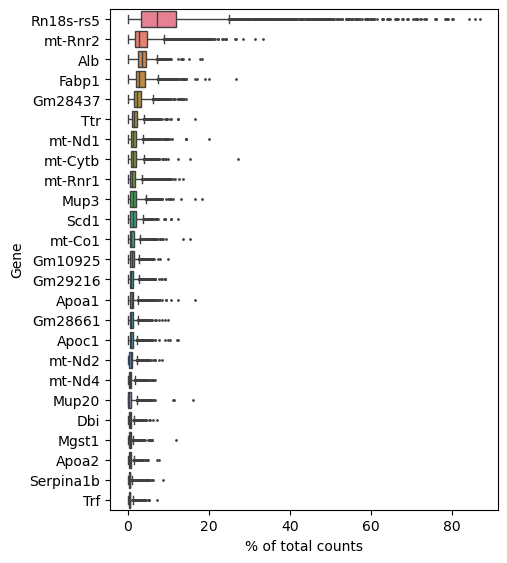

In [30]:
liver_ss3.var_names = liver_ss3.var['Gene']
sc.pl.highest_expr_genes(liver_ss3, n_top=25)

In [31]:
import scanpy as sc
print(sc.__version__)

1.10.1


In [32]:
import scanpy as sc
from scanpy import preprocessing as pp 

In [33]:
pp.filter_cells(liver_ss3, min_genes=800)
pp.filter_genes(liver_ss3, min_cells=10)

In [34]:
liver_ss3

AnnData object with n_obs × n_vars = 3018 × 15442
    obs: 'CellID', 'Plate', 'Index', 'Age', 'Sex', 'Replicate', 'PlateN', 'n_genes'
    var: 'Accession', 'Chromosome', 'End', 'Gene', 'Start', 'Strand', 'n_cells'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [35]:
liver_ss3.var

Accession Chromosome       End        Gene     Start  \
Gene                                                                        
Gm37381     ENSMUSG00000102343          1   4056438     Gm37381   3975962   
Gm6085      ENSMUSG00000098104          1   4759626      Gm6085   4758157   
Mrpl15      ENSMUSG00000033845          1   4855962      Mrpl15   4843429   
Gm57122     ENSMUSG00000120372          1   7159048     Gm57122   7158447   
Gm26901     ENSMUSG00000097797          1   7468093     Gm26901   7419630   
...                        ...        ...       ...         ...       ...   
Eif2s3y     ENSMUSG00000069049          Y   1028847     Eif2s3y   1010543   
Gm29650     ENSMUSG00000099876          Y   1049134     Gm29650   1048393   
Gapdh-ps15  ENSMUSG00000096438          Y  38576129  Gapdh-ps15  38575128   
Gm28700     ENSMUSG00000101602          Y  77518394     Gm28700  77507468   
Gm47283     ENSMUSG00000096768          Y  90827734     Gm47283  90796007   

           Strand  n_cells  
Gene                        
Gm37381         -       31  
Gm6085          -       29  
Mrpl15          -     2301  
Gm57122         -       27  
Gm26901         -       22  
...           ...      ...  
Eif2s3y         +     1252  
Gm29650         +       22  
Gapdh-ps15      +      469  
Gm28700         +       24  
Gm47283         +      400  

[15442 rows x 7 columns]

In [36]:
liver_ss3.obs

CellID       Plate Index    Age  \
cellid                                                                          
AACGTACCGTTGCCTACGTC  ss3_full:AACGTACCGTTGCCTACGTCx  SP_Y_M2_p2   19J  Young   
AACTGCGCCATGGACGGAGT  ss3_full:AACTGCGCCATGGACGGAGTx  SP_Y_M1_p2   10G  Young   
AACGTACCGTGAATAGACCA  ss3_full:AACGTACCGTGAATAGACCAx     SP_2_p2   14J    Old   
AACGTACCGTGGAGATTGAA  ss3_full:AACGTACCGTGGAGATTGAAx     SP_2_p2   14J    Old   
AACGTACCGTCCGTATCATA  ss3_full:AACGTACCGTCCGTATCATAx  SP_Y_M2_p2   19J  Young   
...                                              ...         ...   ...    ...   
TTGTTACTCCTAAGTGCTCG  ss3_full:TTGTTACTCCTAAGTGCTCGx  SP_Y_F1_p3    7B  Young   
TTGTTACTCCTTGTGTCTTC  ss3_full:TTGTTACTCCTTGTGTCTTCx     SP_3_p2    3B    Old   
TTGTTACTCCGTGTTCCACG  ss3_full:TTGTTACTCCGTGTTCCACGx  SP_Y_F1_p3    7B  Young   
TTGTTCGGATCGCTTAATAC  ss3_full:TTGTTCGGATCGCTTAATACx       SP_34    7E    Old   
TTGTTCGGATTTCTGAGTCA  ss3_full:TTGTTCGGATTTCTGAGTCAx       SP_34    7E    Old   

                         Sex Replicate PlateN  n_genes  
cellid                                                  
AACGTACCGTTGCCTACGTC    Male       2.0     p2     2514  
AACTGCGCCATGGACGGAGT    Male       1.0     p2     3421  
AACGTACCGTGAATAGACCA  Female       2.0     p2     2949  
AACGTACCGTGGAGATTGAA  Female       2.0     p2     1312  
AACGTACCGTCCGTATCATA    Male       2.0     p2     6871  
...                      ...       ...    ...      ...  
TTGTTACTCCTAAGTGCTCG  Female       1.0     p3     4021  
TTGTTACTCCTTGTGTCTTC    Male       1.0     p2     3275  
TTGTTACTCCGTGTTCCACG  Female       1.0     p3     5820  
TTGTTCGGATCGCTTAATAC    Male       2.0     p4     3706  
TTGTTCGGATTTCTGAGTCA    Male       2.0     p4     4114  

[3018 rows x 8 columns]

In [37]:
liver_ss3.var['mt'] = liver_ss3.var_names.str.startswith('mt-')
sc.pp.calculate_qc_metrics(liver_ss3, qc_vars = ['mt'], 
                        percent_top = None, 
                        log1p = False,
                        inplace = True,
                       )
                        

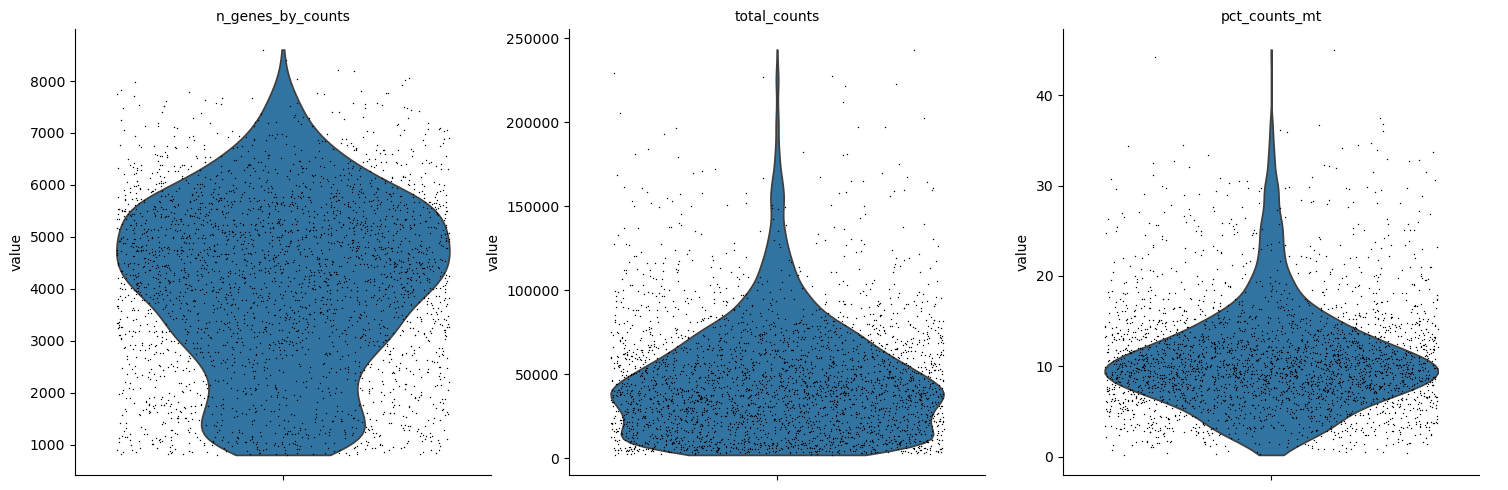

In [38]:
liver_ss3.var_names_make_unique()
#identify potentially problematic cells
sc.pl.violin(liver_ss3, 
             ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
             jitter = 0.4,
             multi_panel = True,
            )

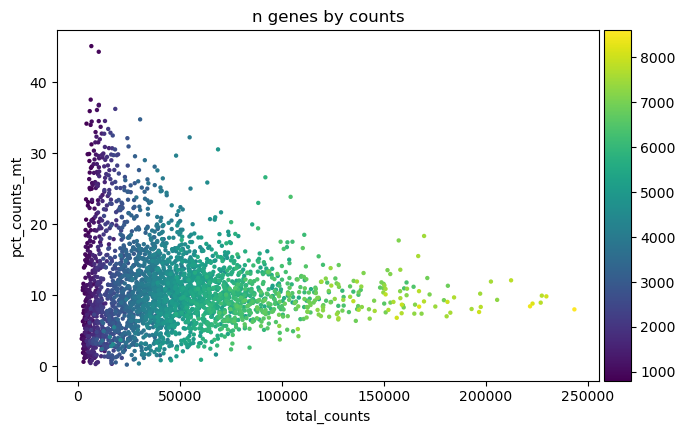

In [39]:
sc.pl.scatter(liver_ss3, x='total_counts', y='pct_counts_mt', color='n_genes_by_counts')
#This plot helps identify cells with unusually high mitochondrial gene expression.
#High mitochondrial counts can indicate cell stress or death (apoptosis), 
#as damaged cells release more mitochondrial RNA.
#Cells with high total counts and high mitochondrial gene percentage 
#might be low-quality cells or doublets (two cells in one droplet), 
#potentially indicating sequencing artifacts or technical errors.

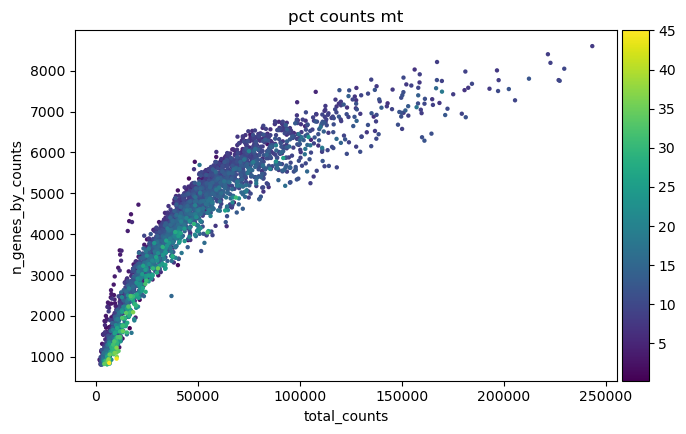

In [40]:

sc.pl.scatter(liver_ss3, x='total_counts', y='n_genes_by_counts', color='pct_counts_mt')
#This plot helps identify cells with low gene diversity (fewer unique genes),
#suggesting low-quality cells or technical issues. A low number of genes might 
#indicate empty droplets, stressed cells, or other problems.
#Cells with high total counts but a low number of unique 
#genes might be technical artifacts or doublets, as they 
#can contain more RNA without a corresponding increase in gene diversity.
#A healthy scRNA-seq dataset often shows a positive correlation between 
#total counts and the number of unique genes. Outliers, such as cells 
#with high counts but few genes or vice versa, can indicate problems.

In [41]:
upper_limit = np.quantile(liver_ss3.obs.n_genes_by_counts, 0.98)
upper_limit

7187.859999999997

In [42]:
liver_ss3 = liver_ss3[liver_ss3.obs.n_genes_by_counts < upper_limit, :]
liver_ss3 = liver_ss3[liver_ss3.obs.pct_counts_mt < 25, :].copy()

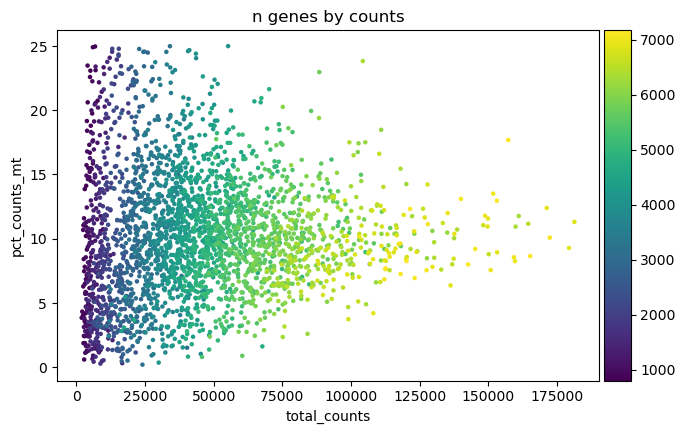

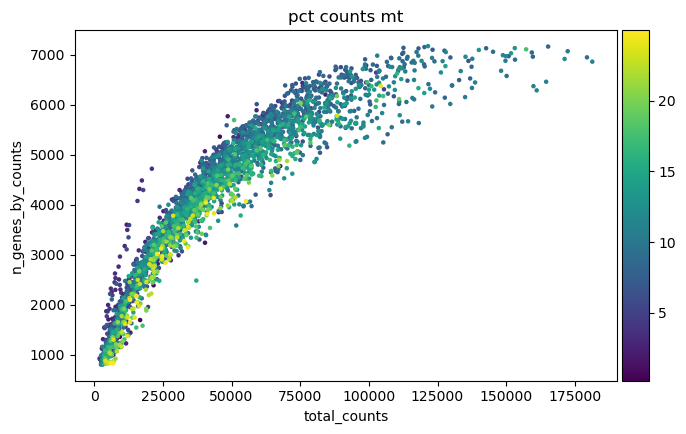

In [43]:
sc.pl.scatter(liver_ss3, x='total_counts', y='pct_counts_mt', color='n_genes_by_counts')
sc.pl.scatter(liver_ss3, x='total_counts', y='n_genes_by_counts', color='pct_counts_mt')

In [44]:
liver_ss3.X.sum(axis = 1)

matrix([[22719.],
        [39147.],
        [24865.],
        ...,
        [65542.],
        [27258.],
        [40318.]], dtype=float32)

In [46]:
liver_ss3.X


<2847x15442 sparse matrix of type '<class 'numpy.float32'>'
	with 11755971 stored elements in Compressed Sparse Row format>

In [47]:
sc.pp.normalize_total(liver_ss3, target_sum = 1e4)

In [48]:
liver_ss3.X.sum(axis = 1)

matrix([[10000.   ],
        [10000.001],
        [10000.   ],
        ...,
        [10000.   ],
        [ 9999.999],
        [10000.   ]], dtype=float32)

In [49]:
sc.pp.log1p(liver_ss3)

In [50]:
liver_ss3.X.sum(axis = 1)

matrix([[2155.5076],
        [2093.4417],
        [2534.3337],
        ...,
        [3184.176 ],
        [2841.8372],
        [2849.9768]], dtype=float32)

In [51]:
#finding highly variable genes
sc.pp.highly_variable_genes(liver_ss3, min_mean = 0.0125, max_mean = 3, min_disp = 0.5)

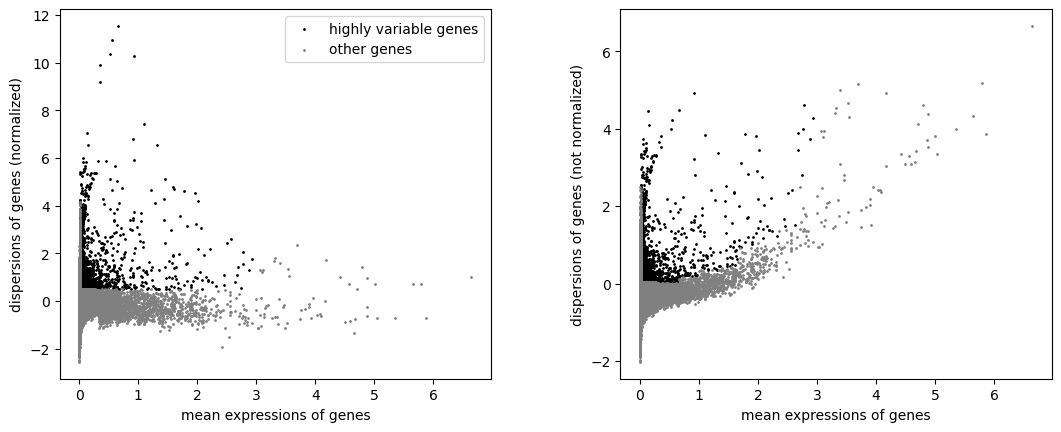

In [52]:
sc.pl.highly_variable_genes(liver_ss3)

In [53]:
liver_ss3 = liver_ss3[:, liver_ss3.var.highly_variable]
liver_ss3

View of AnnData object with n_obs × n_vars = 2847 × 1900
    obs: 'CellID', 'Plate', 'Index', 'Age', 'Sex', 'Replicate', 'PlateN', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'Accession', 'Chromosome', 'End', 'Gene', 'Start', 'Strand', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

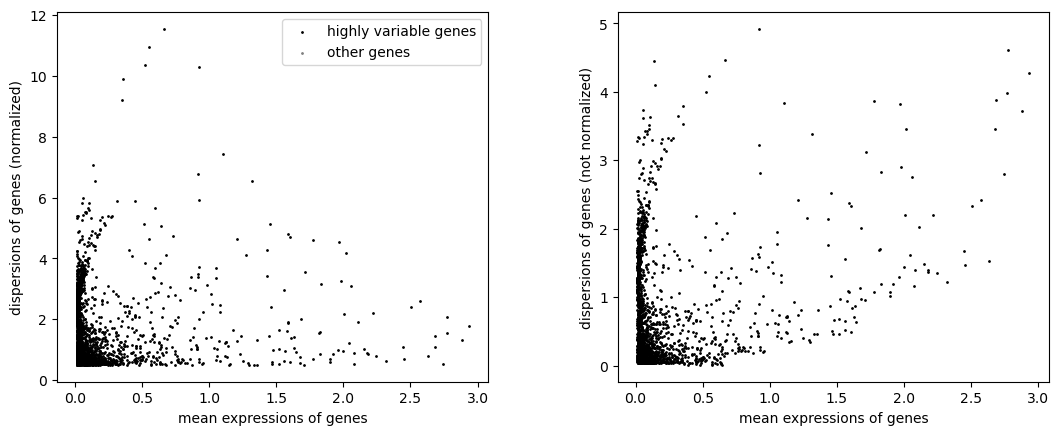

In [54]:
sc.pl.highly_variable_genes(liver_ss3)

In [55]:
sc.pp.regress_out(liver_ss3, ['total_counts', 'pct_counts_mt'])

In [56]:
sc.pp.scale(liver_ss3, max_value = 10)

In [57]:
sc.tl.pca(liver_ss3, svd_solver = "arpack")

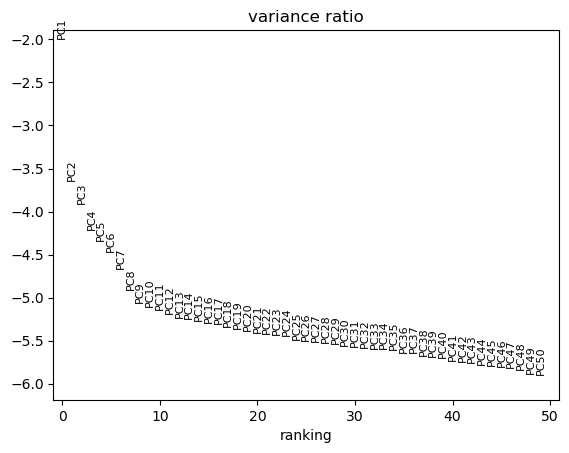

In [58]:
sc.pl.pca_variance_ratio(liver_ss3, log = True, n_pcs = 50)

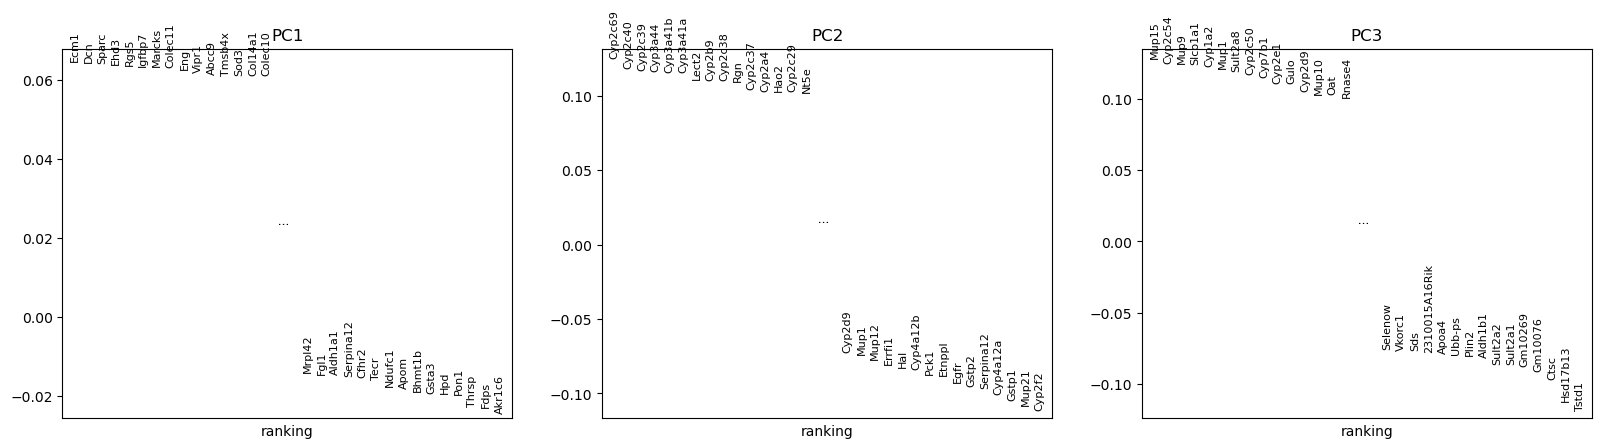

In [59]:
sc.pl.pca_loadings(liver_ss3)

In [60]:
sc.pp.neighbors(liver_ss3, n_pcs = 15)

In [61]:
sc.tl.umap(liver_ss3)

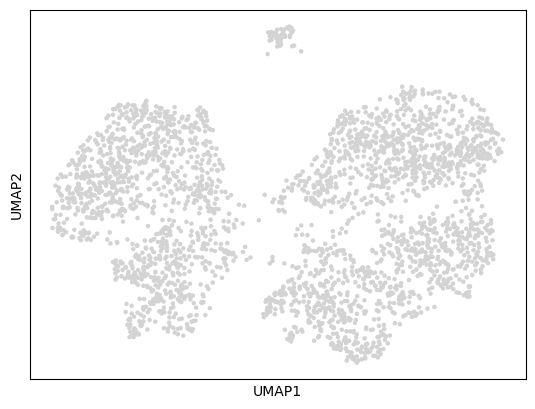

In [62]:
sc.pl.umap(liver_ss3)

In [81]:
sc.tl.leiden(liver_ss3, resolution = 0.5)

In [64]:
liver_ss3.obs

CellID       Plate Index    Age  \
cellid                                                                          
AACGTACCGTTGCCTACGTC  ss3_full:AACGTACCGTTGCCTACGTCx  SP_Y_M2_p2   19J  Young   
AACTGCGCCATGGACGGAGT  ss3_full:AACTGCGCCATGGACGGAGTx  SP_Y_M1_p2   10G  Young   
AACGTACCGTGAATAGACCA  ss3_full:AACGTACCGTGAATAGACCAx     SP_2_p2   14J    Old   
AACGTACCGTGGAGATTGAA  ss3_full:AACGTACCGTGGAGATTGAAx     SP_2_p2   14J    Old   
AACGTACCGTCCGTATCATA  ss3_full:AACGTACCGTCCGTATCATAx  SP_Y_M2_p2   19J  Young   
...                                              ...         ...   ...    ...   
TTGTTACTCCTAAGTGCTCG  ss3_full:TTGTTACTCCTAAGTGCTCGx  SP_Y_F1_p3    7B  Young   
TTGTTACTCCTTGTGTCTTC  ss3_full:TTGTTACTCCTTGTGTCTTCx     SP_3_p2    3B    Old   
TTGTTACTCCGTGTTCCACG  ss3_full:TTGTTACTCCGTGTTCCACGx  SP_Y_F1_p3    7B  Young   
TTGTTCGGATCGCTTAATAC  ss3_full:TTGTTCGGATCGCTTAATACx       SP_34    7E    Old   
TTGTTCGGATTTCTGAGTCA  ss3_full:TTGTTCGGATTTCTGAGTCAx       SP_34    7E    Old   

                         Sex Replicate PlateN  n_genes  n_genes_by_counts  \
cellid                                                                      
AACGTACCGTTGCCTACGTC    Male       2.0     p2     2514               2513   
AACTGCGCCATGGACGGAGT    Male       1.0     p2     3421               3419   
AACGTACCGTGAATAGACCA  Female       2.0     p2     2949               2948   
AACGTACCGTGGAGATTGAA  Female       2.0     p2     1312               1312   
AACGTACCGTCCGTATCATA    Male       2.0     p2     6871               6839   
...                      ...       ...    ...      ...                ...   
TTGTTACTCCTAAGTGCTCG  Female       1.0     p3     4021               4015   
TTGTTACTCCTTGTGTCTTC    Male       1.0     p2     3275               3271   
TTGTTACTCCGTGTTCCACG  Female       1.0     p3     5820               5796   
TTGTTCGGATCGCTTAATAC    Male       2.0     p4     3706               3701   
TTGTTCGGATTTCTGAGTCA    Male       2.0     p4     4114               4109   

                      total_counts  total_counts_mt  pct_counts_mt leiden  
cellid                                                                     
AACGTACCGTTGCCTACGTC       22719.0            992.0       4.366389      0  
AACTGCGCCATGGACGGAGT       39147.0           7553.0      19.293943      0  
AACGTACCGTGAATAGACCA       24865.0            890.0       3.579328      3  
AACGTACCGTGGAGATTGAA        5596.0            264.0       4.717656      3  
AACGTACCGTCCGTATCATA      116682.0          11986.0      10.272365      0  
...                            ...              ...            ...    ...  
TTGTTACTCCTAAGTGCTCG       36888.0           4544.0      12.318369      2  
TTGTTACTCCTTGTGTCTTC       24552.0           3328.0      13.554904      6  
TTGTTACTCCGTGTTCCACG       65542.0           5396.0       8.232888      2  
TTGTTCGGATCGCTTAATAC       27258.0           2186.0       8.019664      6  
TTGTTCGGATTTCTGAGTCA       40318.0           4158.0      10.313012      1  

[2847 rows x 13 columns]

In [66]:
liver_ss3.uns

OrderedDict([('log1p', {'base': None}),
             ('hvg', {'flavor': 'seurat'}),
             ('pca',
              {'params': {'zero_center': True,
                'use_highly_variable': True,
                'mask_var': 'highly_variable'},
               'variance': array([216.1889875 ,  41.45189767,  31.85868558,  23.54367089,
                       20.74213177,  18.19515418,  14.93609732,  11.61418935,
                       10.05726478,   9.53157249,   9.23591718,   8.8370437 ,
                        8.47153104,   8.34263767,   8.14518101,   7.91499102,
                        7.86772749,   7.60706453,   7.39522677,   7.22240705,
                        7.05646295,   7.03368823,   6.91071265,   6.81233568,
                        6.50572307,   6.43397115,   6.34959575,   6.33035563,
                        6.23412339,   6.08267931,   6.00199219,   5.9663331 ,
                        5.90999818,   5.88115661,   5.78254796,   5.58844152,
                        5.58226287,   5.4

In [67]:
sc.set_figure_params(figsize=(5, 5))

In [68]:
liver_ss3.obs

CellID       Plate Index    Age  \
cellid                                                                          
AACGTACCGTTGCCTACGTC  ss3_full:AACGTACCGTTGCCTACGTCx  SP_Y_M2_p2   19J  Young   
AACTGCGCCATGGACGGAGT  ss3_full:AACTGCGCCATGGACGGAGTx  SP_Y_M1_p2   10G  Young   
AACGTACCGTGAATAGACCA  ss3_full:AACGTACCGTGAATAGACCAx     SP_2_p2   14J    Old   
AACGTACCGTGGAGATTGAA  ss3_full:AACGTACCGTGGAGATTGAAx     SP_2_p2   14J    Old   
AACGTACCGTCCGTATCATA  ss3_full:AACGTACCGTCCGTATCATAx  SP_Y_M2_p2   19J  Young   
...                                              ...         ...   ...    ...   
TTGTTACTCCTAAGTGCTCG  ss3_full:TTGTTACTCCTAAGTGCTCGx  SP_Y_F1_p3    7B  Young   
TTGTTACTCCTTGTGTCTTC  ss3_full:TTGTTACTCCTTGTGTCTTCx     SP_3_p2    3B    Old   
TTGTTACTCCGTGTTCCACG  ss3_full:TTGTTACTCCGTGTTCCACGx  SP_Y_F1_p3    7B  Young   
TTGTTCGGATCGCTTAATAC  ss3_full:TTGTTCGGATCGCTTAATACx       SP_34    7E    Old   
TTGTTCGGATTTCTGAGTCA  ss3_full:TTGTTCGGATTTCTGAGTCAx       SP_34    7E    Old   

                         Sex Replicate PlateN  n_genes  n_genes_by_counts  \
cellid                                                                      
AACGTACCGTTGCCTACGTC    Male       2.0     p2     2514               2513   
AACTGCGCCATGGACGGAGT    Male       1.0     p2     3421               3419   
AACGTACCGTGAATAGACCA  Female       2.0     p2     2949               2948   
AACGTACCGTGGAGATTGAA  Female       2.0     p2     1312               1312   
AACGTACCGTCCGTATCATA    Male       2.0     p2     6871               6839   
...                      ...       ...    ...      ...                ...   
TTGTTACTCCTAAGTGCTCG  Female       1.0     p3     4021               4015   
TTGTTACTCCTTGTGTCTTC    Male       1.0     p2     3275               3271   
TTGTTACTCCGTGTTCCACG  Female       1.0     p3     5820               5796   
TTGTTCGGATCGCTTAATAC    Male       2.0     p4     3706               3701   
TTGTTCGGATTTCTGAGTCA    Male       2.0     p4     4114               4109   

                      total_counts  total_counts_mt  pct_counts_mt leiden  
cellid                                                                     
AACGTACCGTTGCCTACGTC       22719.0            992.0       4.366389      0  
AACTGCGCCATGGACGGAGT       39147.0           7553.0      19.293943      0  
AACGTACCGTGAATAGACCA       24865.0            890.0       3.579328      3  
AACGTACCGTGGAGATTGAA        5596.0            264.0       4.717656      3  
AACGTACCGTCCGTATCATA      116682.0          11986.0      10.272365      0  
...                            ...              ...            ...    ...  
TTGTTACTCCTAAGTGCTCG       36888.0           4544.0      12.318369      2  
TTGTTACTCCTTGTGTCTTC       24552.0           3328.0      13.554904      6  
TTGTTACTCCGTGTTCCACG       65542.0           5396.0       8.232888      2  
TTGTTCGGATCGCTTAATAC       27258.0           2186.0       8.019664      6  
TTGTTCGGATTTCTGAGTCA       40318.0           4158.0      10.313012      1  

[2847 rows x 13 columns]

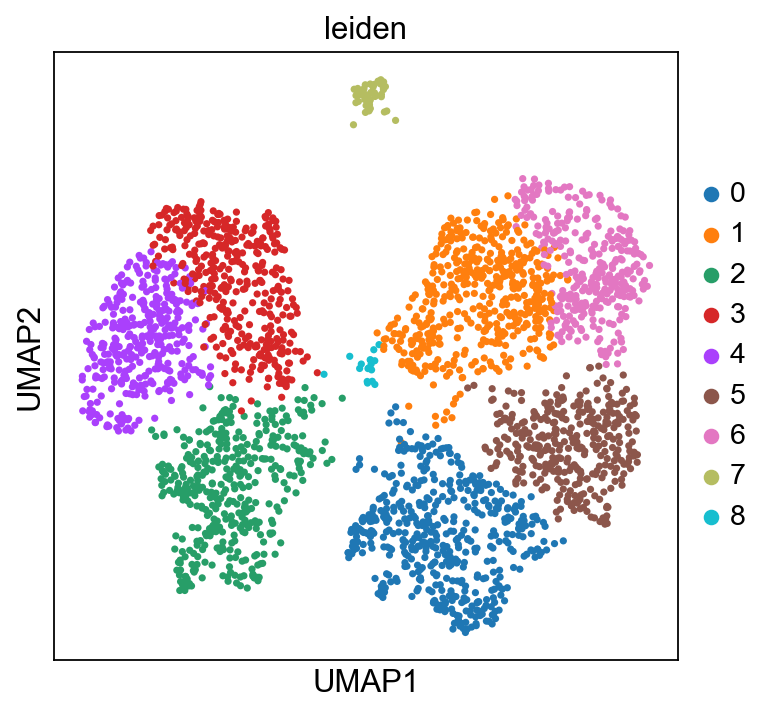

In [82]:
sc.pl.umap(liver_ss3, color = ['leiden'])

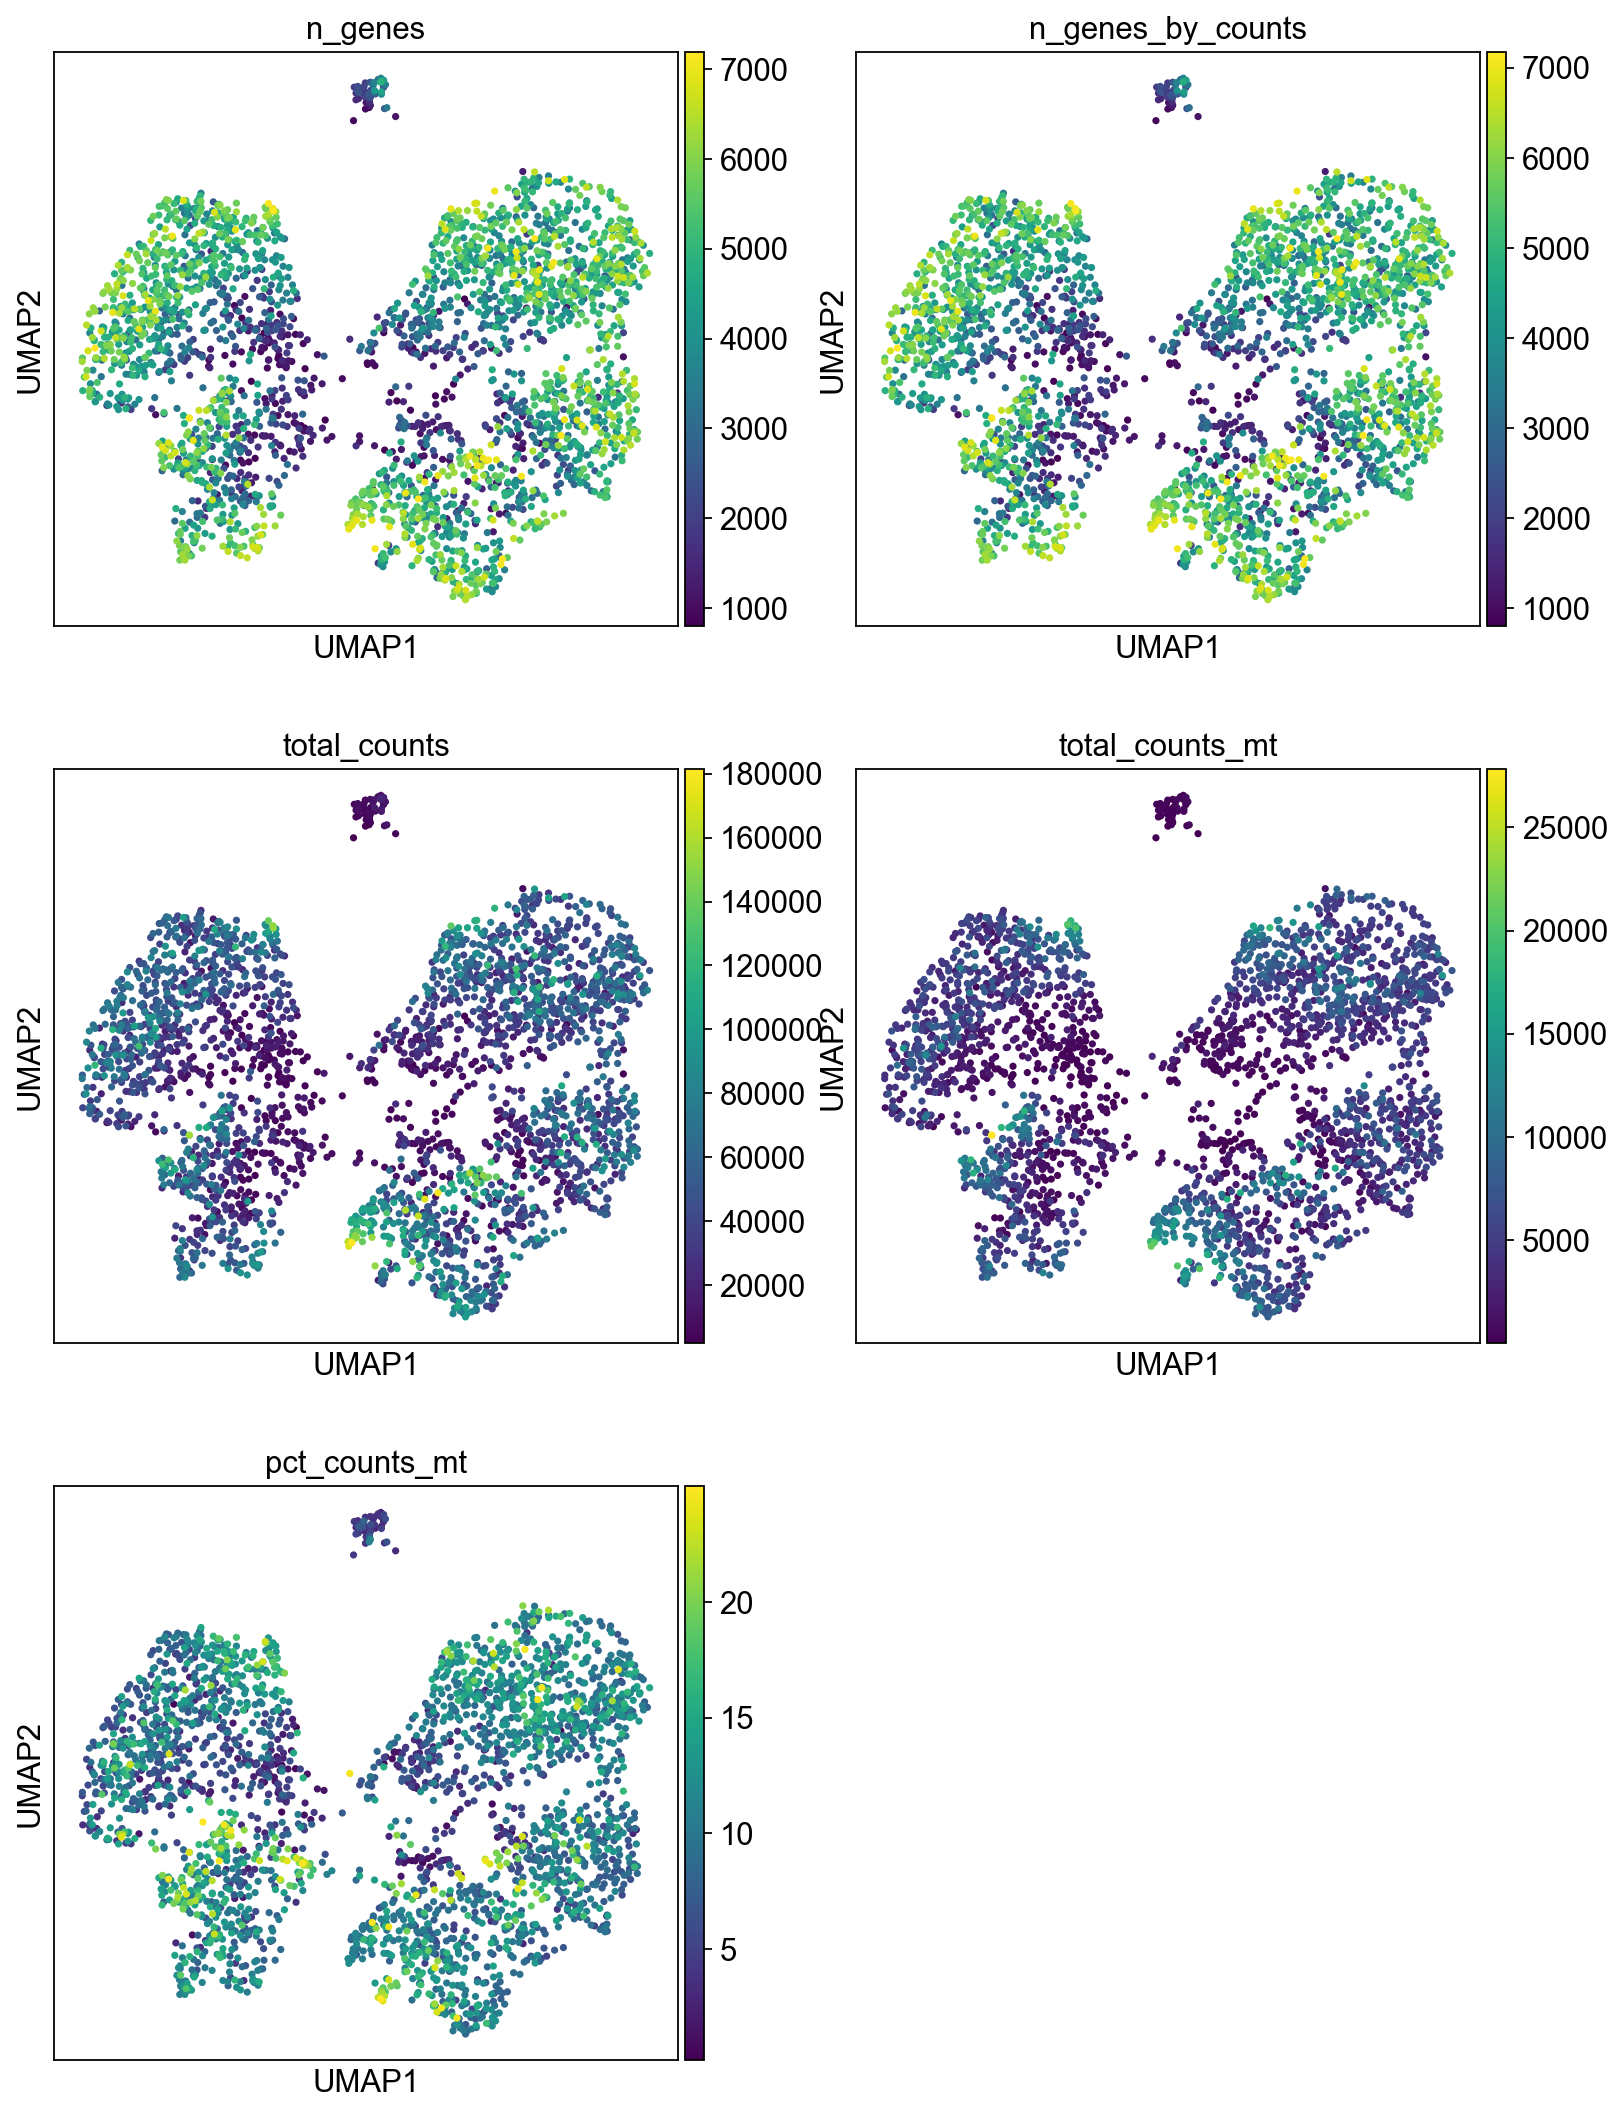

In [70]:
import seaborn as sns
colorblind_palette = sns.color_palette("tab10")
sc.pl.umap(liver_ss3, color = ['n_genes', 'n_genes_by_counts','total_counts', 'total_counts_mt', 'pct_counts_mt'], palette=colorblind_palette, ncols =2 )

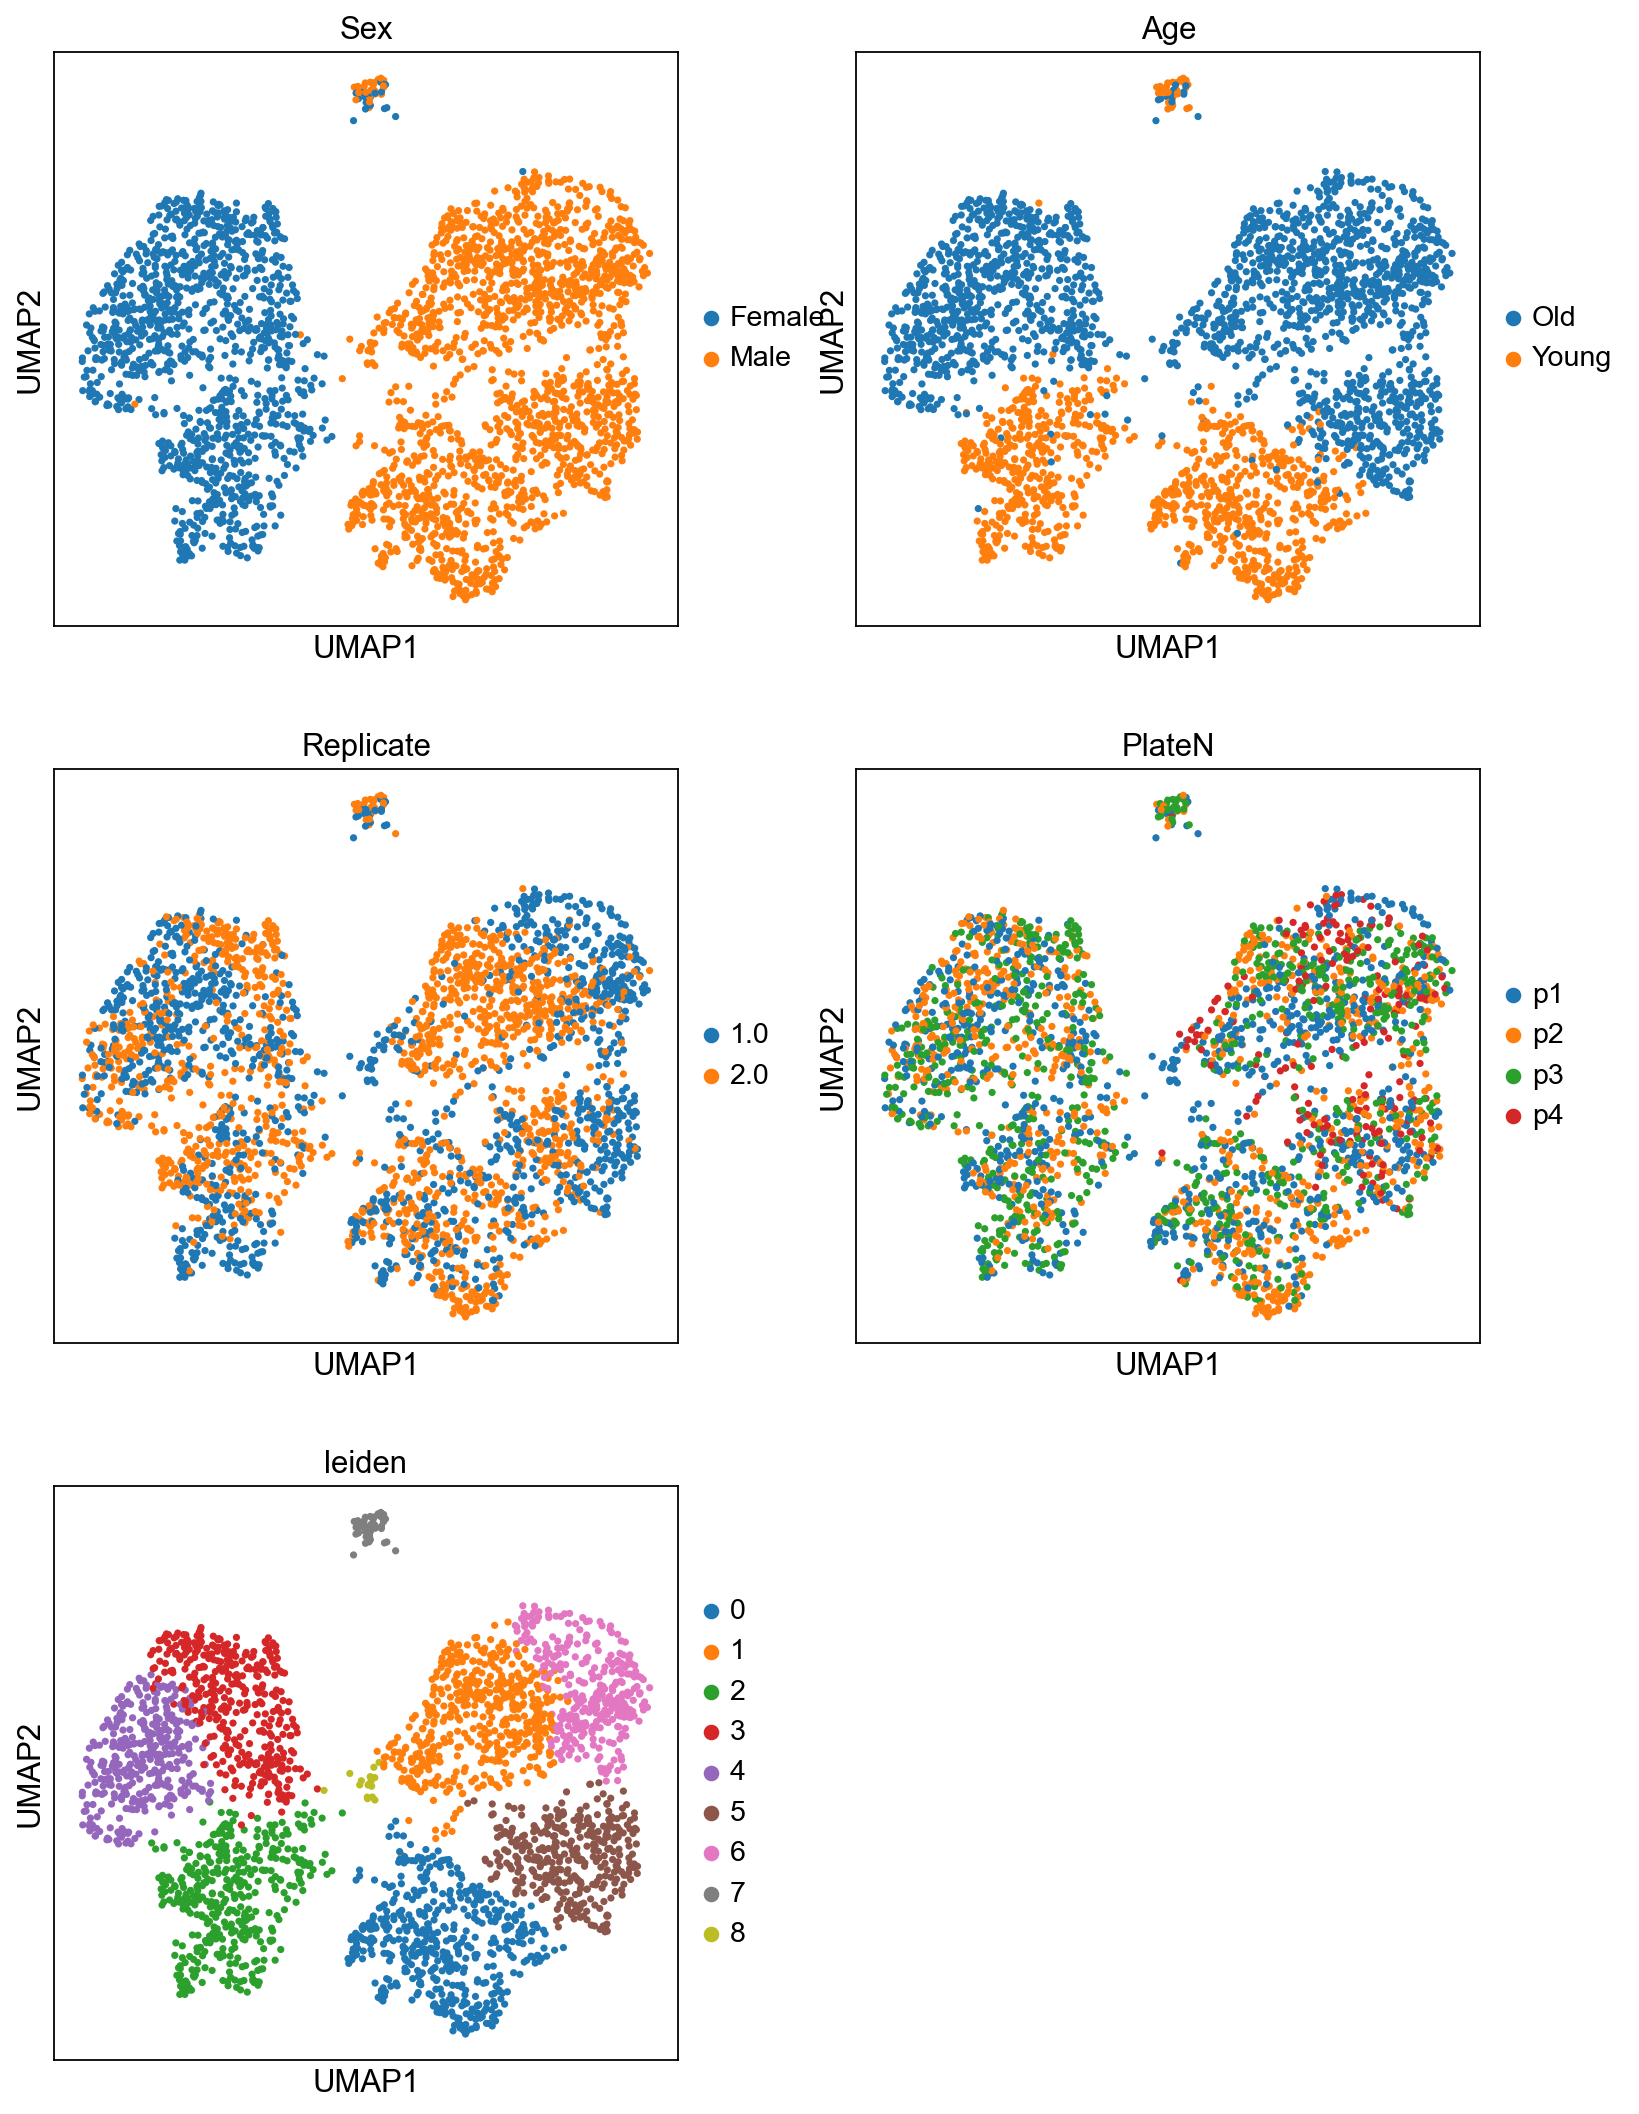

In [71]:
import seaborn as sns
colorblind_palette = sns.color_palette("tab10")
sc.pl.umap(liver_ss3, color = ['Sex', 'Age','Replicate', 'PlateN', 'leiden'], palette=colorblind_palette, ncols =2)

In [64]:
sc.tl.rank_genes_groups(liver_ss3, 'leiden', method='t-test', key_added = "t-test")
sc.pl.rank_genes_groups(liver_ss3, n_genes=25, sharey=False, key = "t-test", ncols=1)

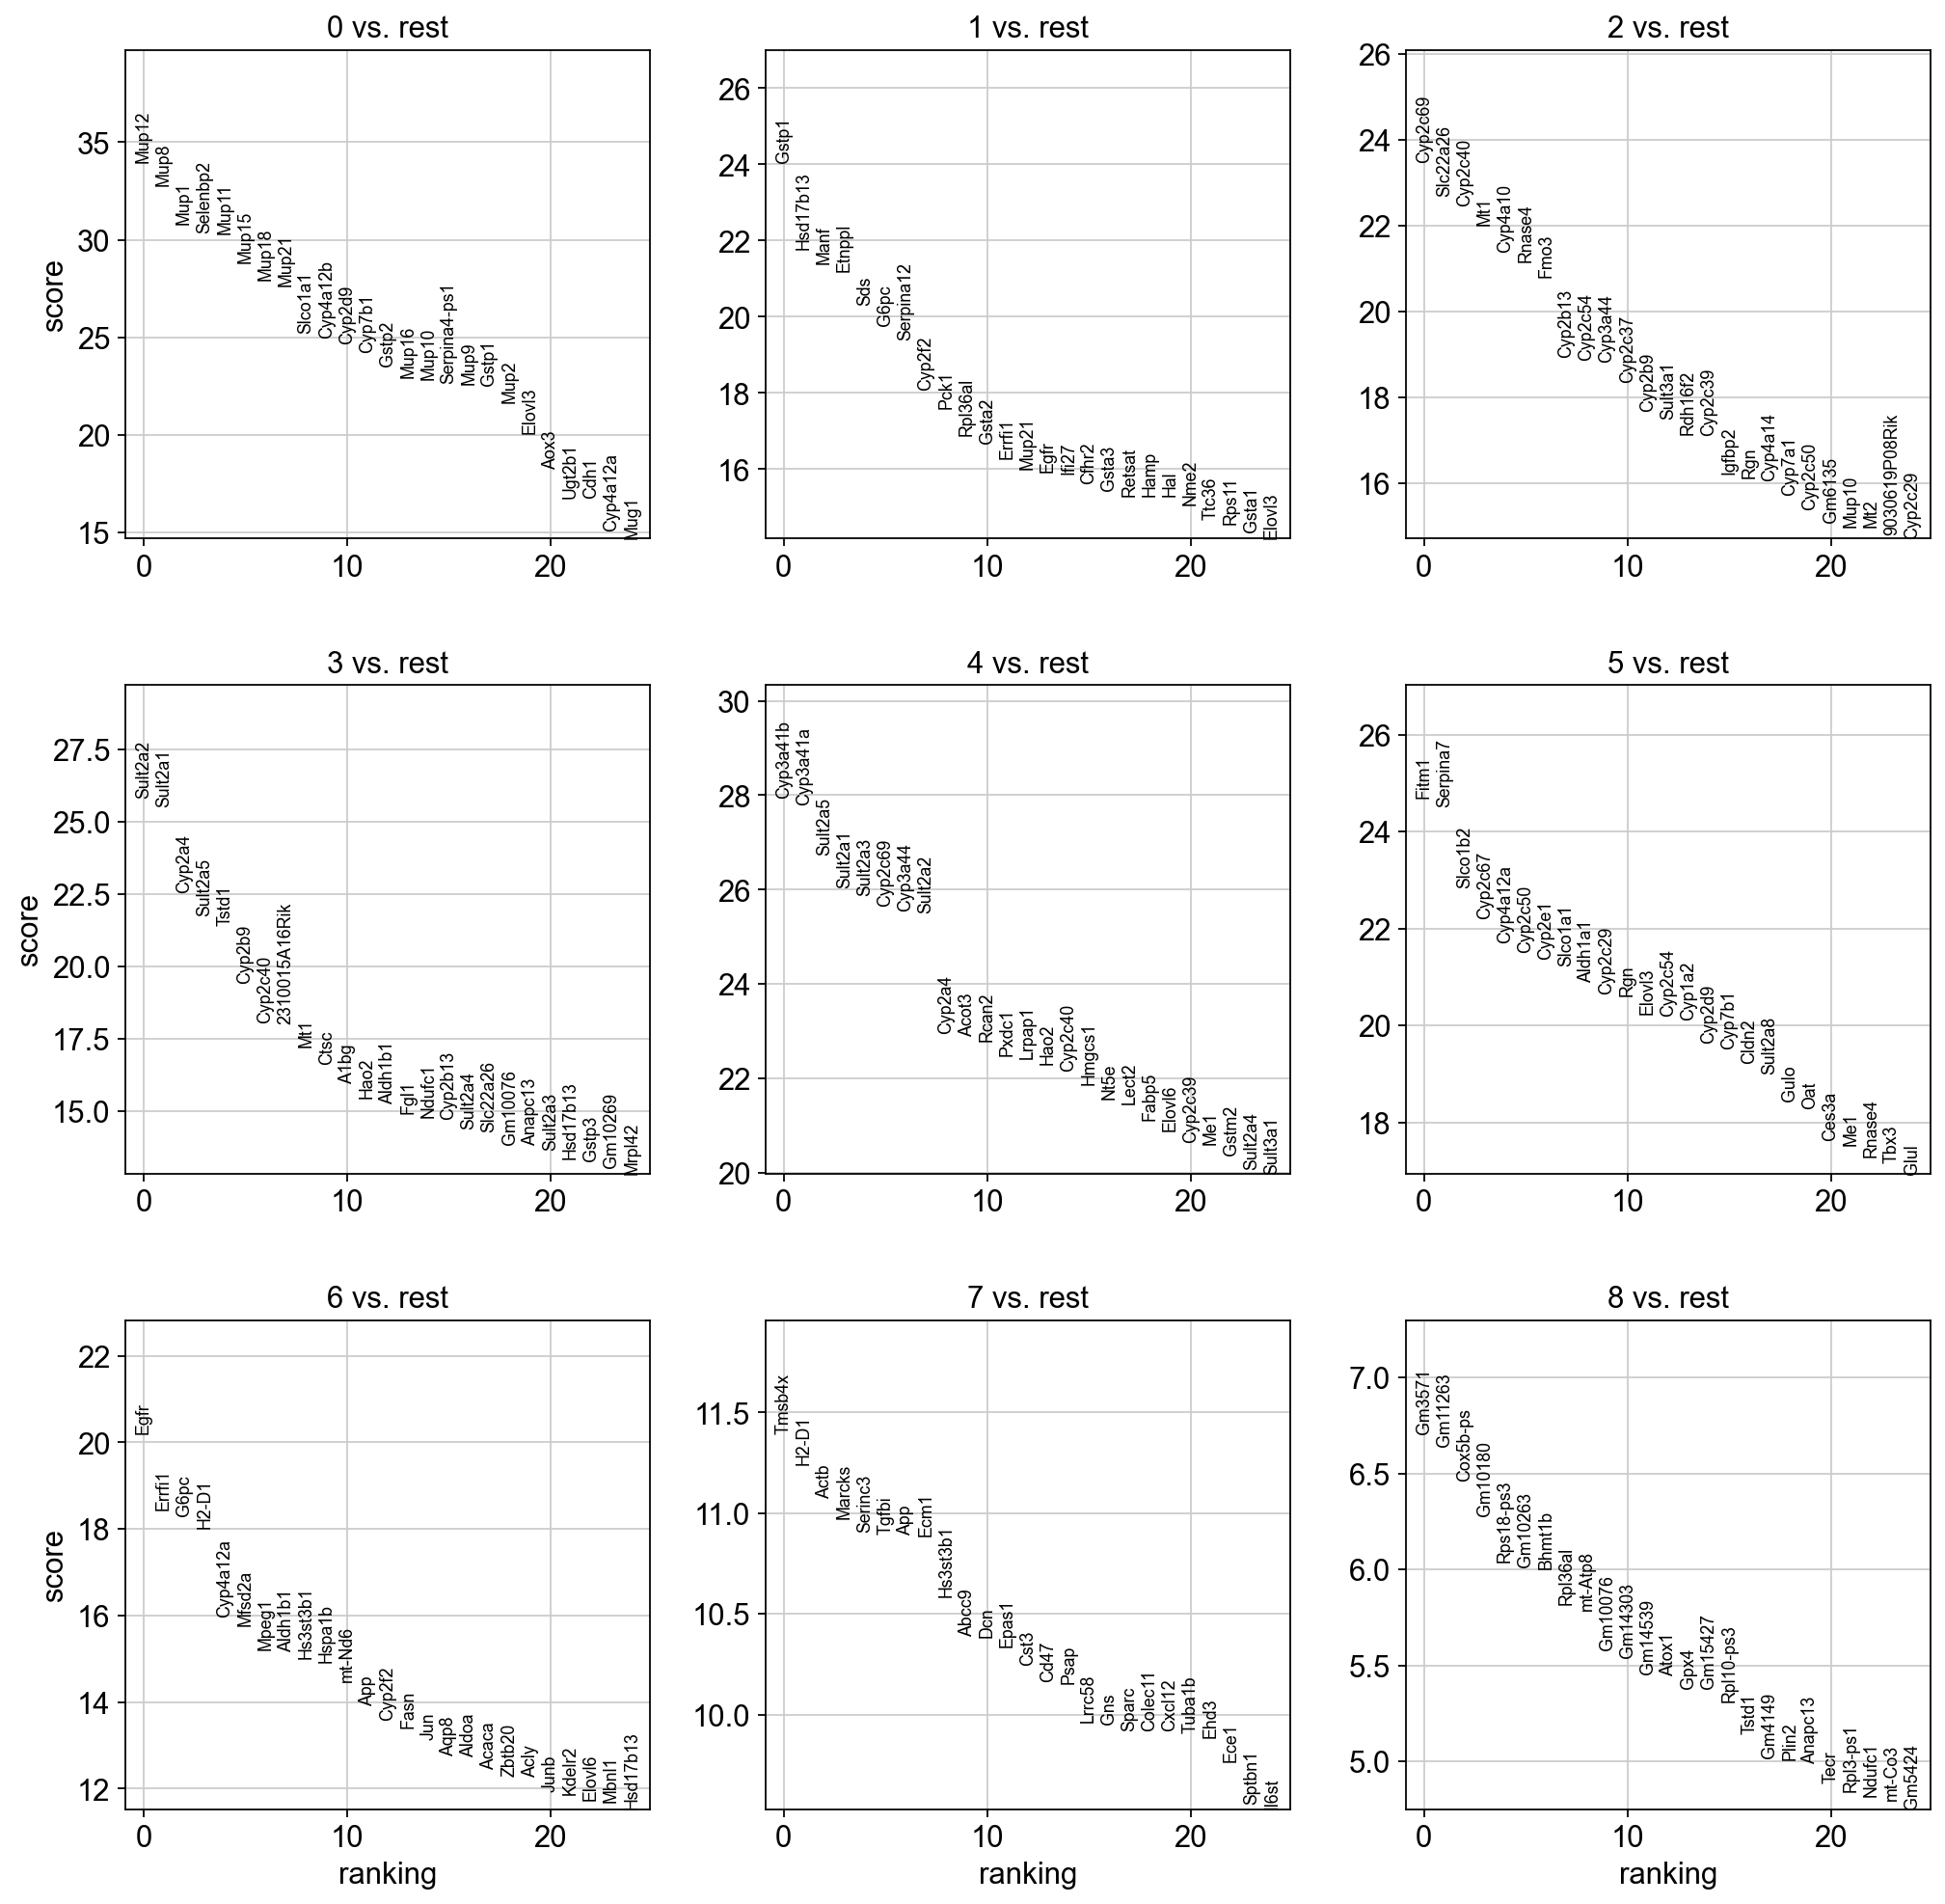

In [83]:
sc.tl.rank_genes_groups(liver_ss3, 'leiden', method='wilcoxon', key_added = "wilcoxon")
sc.pl.rank_genes_groups(liver_ss3, n_genes=25, sharey=False, key = "wilcoxon", ncols=3)

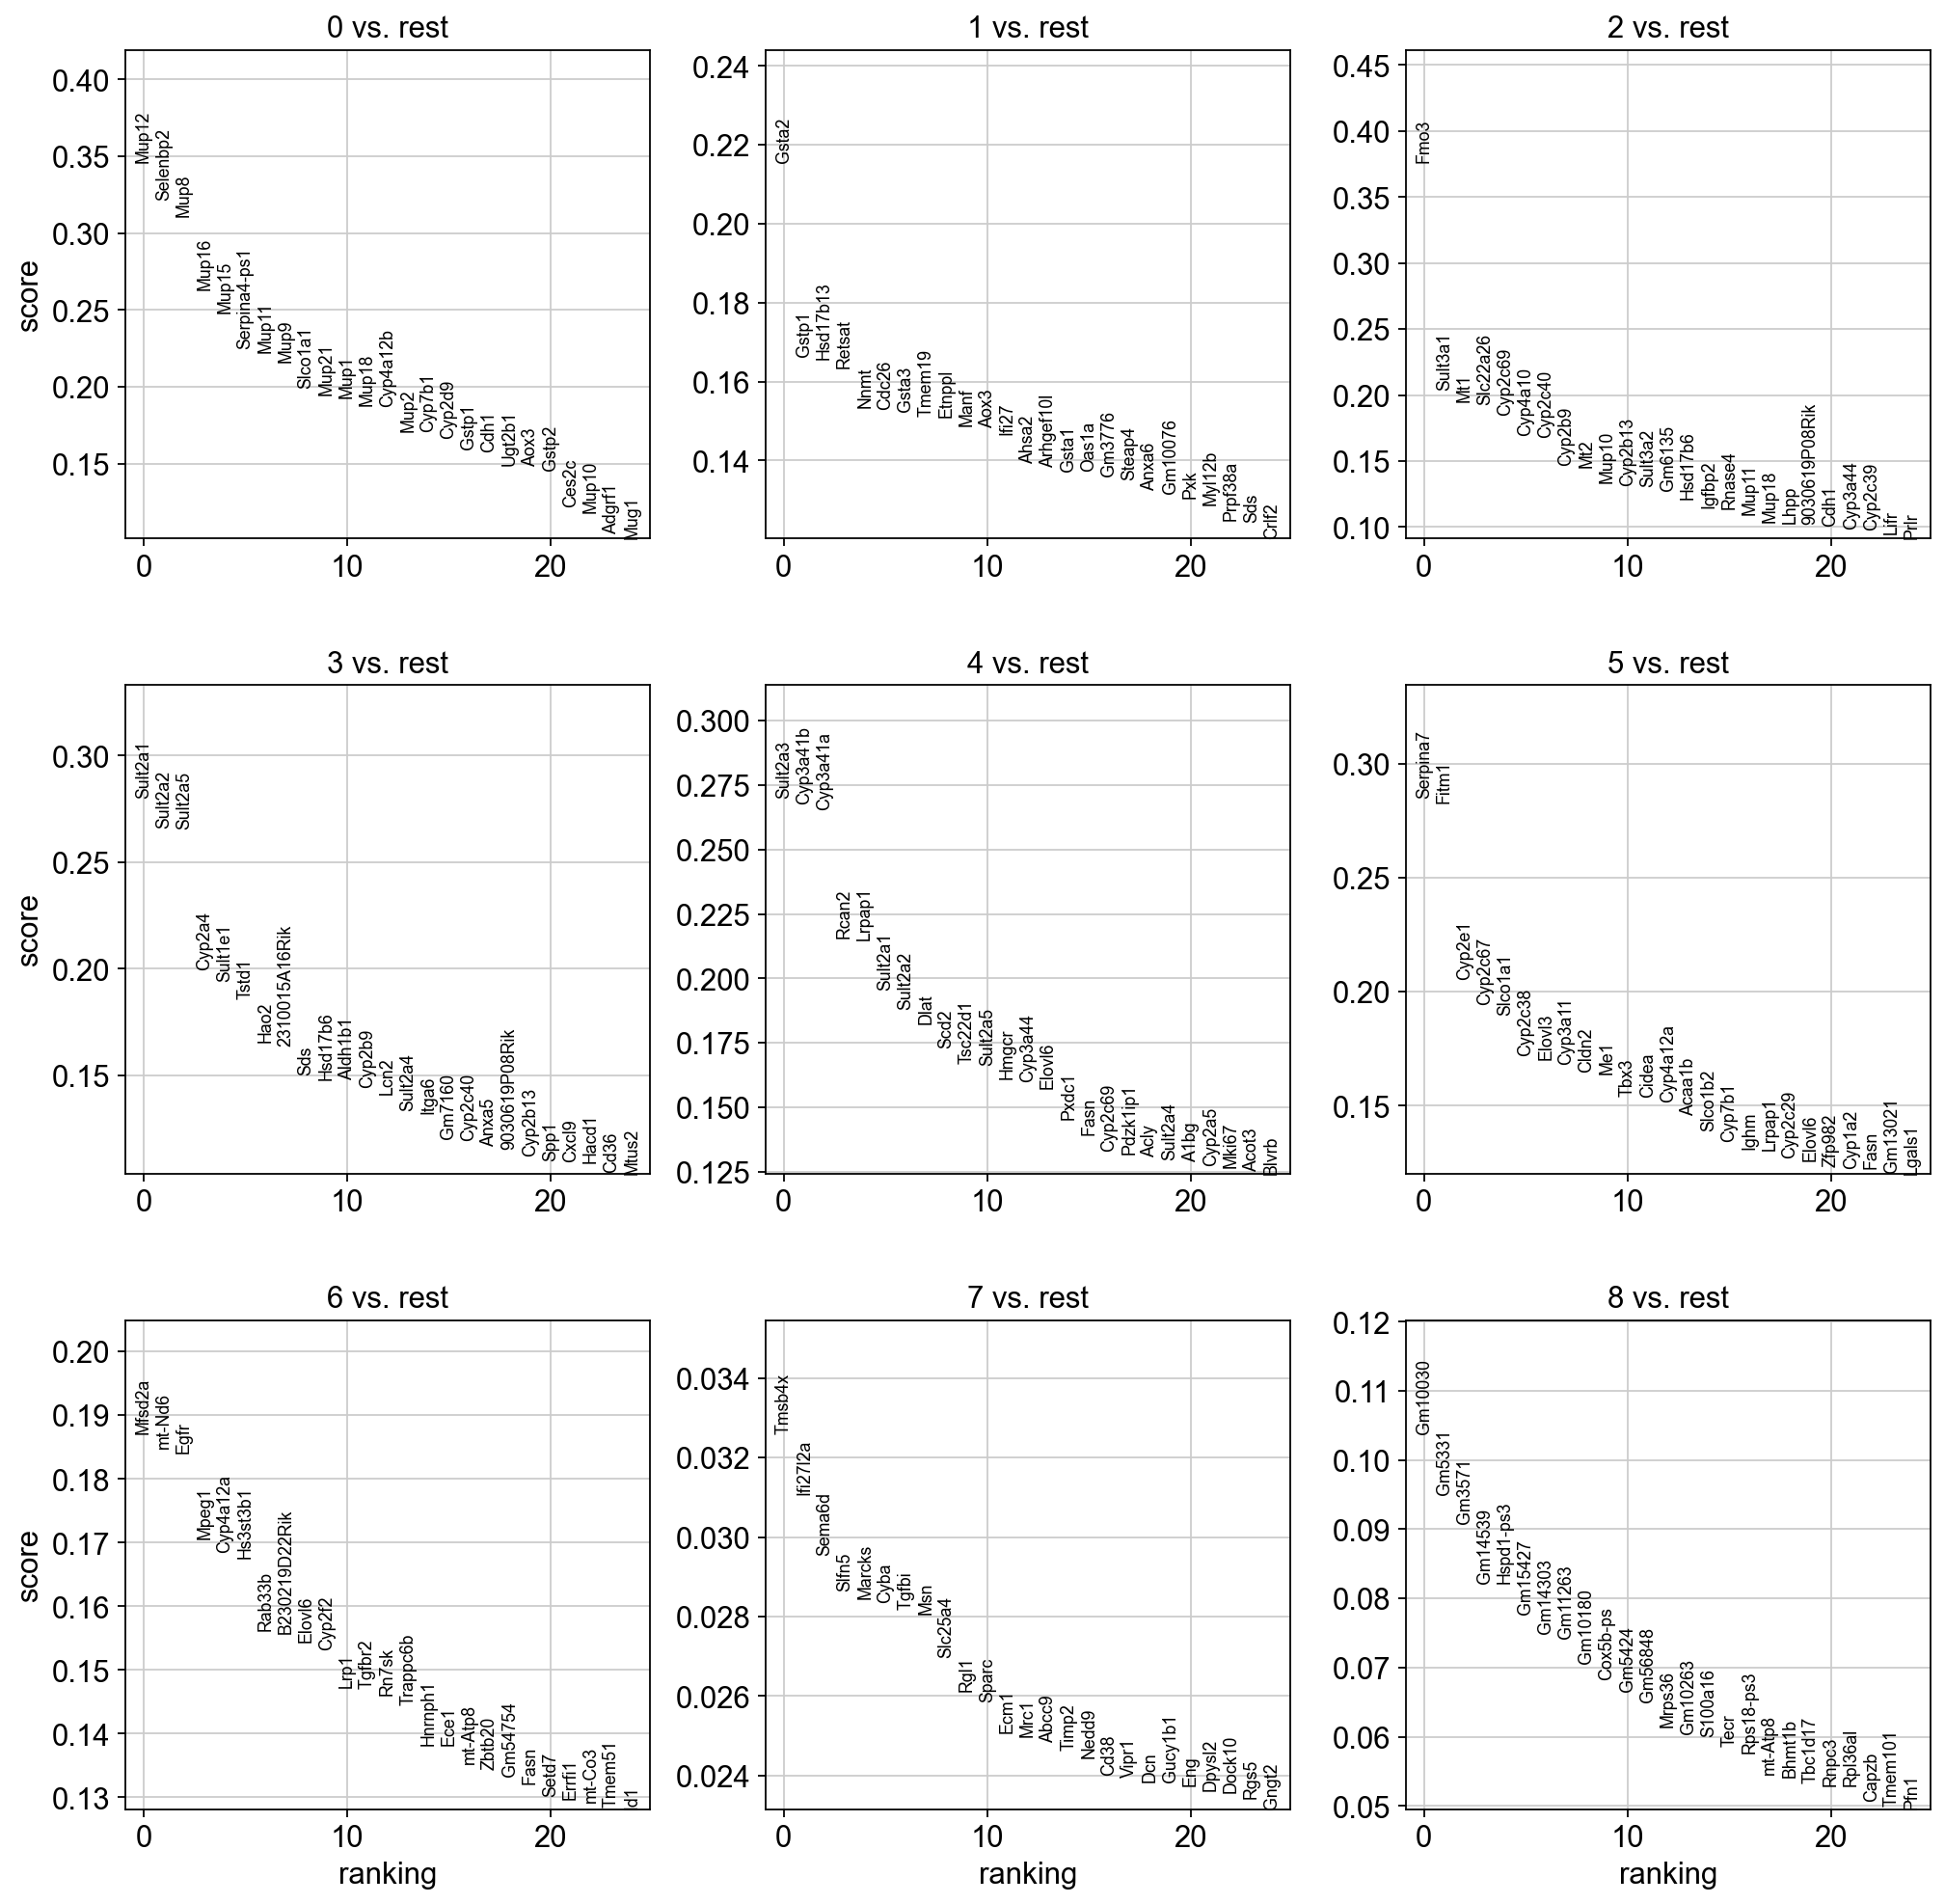

In [74]:
sc.tl.rank_genes_groups(liver_ss3, 'leiden', method='logreg')
sc.pl.rank_genes_groups(liver_ss3, n_genes=25, sharey=False, ncols=3)

In [80]:
liver_ss3.uns

OrderedDict([('log1p', {'base': None}),
             ('hvg', {'flavor': 'seurat'}),
             ('pca',
              {'params': {'zero_center': True,
                'use_highly_variable': True,
                'mask_var': 'highly_variable'},
               'variance': array([216.1889875 ,  41.45189767,  31.85868558,  23.54367089,
                       20.74213177,  18.19515418,  14.93609732,  11.61418935,
                       10.05726478,   9.53157249,   9.23591718,   8.8370437 ,
                        8.47153104,   8.34263767,   8.14518101,   7.91499102,
                        7.86772749,   7.60706453,   7.39522677,   7.22240705,
                        7.05646295,   7.03368823,   6.91071265,   6.81233568,
                        6.50572307,   6.43397115,   6.34959575,   6.33035563,
                        6.23412339,   6.08267931,   6.00199219,   5.9663331 ,
                        5.90999818,   5.88115661,   5.78254796,   5.58844152,
                        5.58226287,   5.4

In [67]:
print(liver_ss3.obs['leiden'].unique())

['0', '3', '1', '6', '5', '4', '2', '7', '8']
Categories (9, object): ['0', '1', '2', '3', ..., '5', '6', '7', '8']


In [68]:
def annotate_clusters(row):
    cluster_id = int(row['leiden'])  
    age = 'old' if cluster_id not in [0, 2] else 'young'
    sex = 'female' if cluster_id in [2, 3, 4] else 'male'
    cell_type = 'Kupffer' if cluster_id == 7 else 'hep'
    
    if cell_type == 'Kupffer':
        return f'{cell_type} cells'
    else:
        return f'{age} {sex} {cell_type}'

In [69]:
liver_ss3.obs['Annotated Cluster'] = liver_ss3.obs.apply(annotate_clusters, axis = 1)

In [70]:
liver_ss3.obs

CellID       Plate Index    Age  \
cellid                                                                          
AACGTACCGTTGCCTACGTC  ss3_full:AACGTACCGTTGCCTACGTCx  SP_Y_M2_p2   19J  Young   
AACTGCGCCATGGACGGAGT  ss3_full:AACTGCGCCATGGACGGAGTx  SP_Y_M1_p2   10G  Young   
AACGTACCGTGAATAGACCA  ss3_full:AACGTACCGTGAATAGACCAx     SP_2_p2   14J    Old   
AACGTACCGTGGAGATTGAA  ss3_full:AACGTACCGTGGAGATTGAAx     SP_2_p2   14J    Old   
AACGTACCGTCCGTATCATA  ss3_full:AACGTACCGTCCGTATCATAx  SP_Y_M2_p2   19J  Young   
...                                              ...         ...   ...    ...   
TTGTTACTCCTAAGTGCTCG  ss3_full:TTGTTACTCCTAAGTGCTCGx  SP_Y_F1_p3    7B  Young   
TTGTTACTCCTTGTGTCTTC  ss3_full:TTGTTACTCCTTGTGTCTTCx     SP_3_p2    3B    Old   
TTGTTACTCCGTGTTCCACG  ss3_full:TTGTTACTCCGTGTTCCACGx  SP_Y_F1_p3    7B  Young   
TTGTTCGGATCGCTTAATAC  ss3_full:TTGTTCGGATCGCTTAATACx       SP_34    7E    Old   
TTGTTCGGATTTCTGAGTCA  ss3_full:TTGTTCGGATTTCTGAGTCAx       SP_34    7E    Old   

                         Sex Replicate PlateN  n_genes  n_genes_by_counts  \
cellid                                                                      
AACGTACCGTTGCCTACGTC    Male       2.0     p2     2514               2513   
AACTGCGCCATGGACGGAGT    Male       1.0     p2     3421               3419   
AACGTACCGTGAATAGACCA  Female       2.0     p2     2949               2948   
AACGTACCGTGGAGATTGAA  Female       2.0     p2     1312               1312   
AACGTACCGTCCGTATCATA    Male       2.0     p2     6871               6839   
...                      ...       ...    ...      ...                ...   
TTGTTACTCCTAAGTGCTCG  Female       1.0     p3     4021               4015   
TTGTTACTCCTTGTGTCTTC    Male       1.0     p2     3275               3271   
TTGTTACTCCGTGTTCCACG  Female       1.0     p3     5820               5796   
TTGTTCGGATCGCTTAATAC    Male       2.0     p4     3706               3701   
TTGTTCGGATTTCTGAGTCA    Male       2.0     p4     4114               4109   

                      total_counts  total_counts_mt  pct_counts_mt leiden  \
cellid                                                                      
AACGTACCGTTGCCTACGTC       22719.0            992.0       4.366389      0   
AACTGCGCCATGGACGGAGT       39147.0           7553.0      19.293943      0   
AACGTACCGTGAATAGACCA       24865.0            890.0       3.579328      3   
AACGTACCGTGGAGATTGAA        5596.0            264.0       4.717656      3   
AACGTACCGTCCGTATCATA      116682.0          11986.0      10.272365      0   
...                            ...              ...            ...    ...   
TTGTTACTCCTAAGTGCTCG       36888.0           4544.0      12.318369      2   
TTGTTACTCCTTGTGTCTTC       24552.0           3328.0      13.554904      6   
TTGTTACTCCGTGTTCCACG       65542.0           5396.0       8.232888      2   
TTGTTCGGATCGCTTAATAC       27258.0           2186.0       8.019664      6   
TTGTTCGGATTTCTGAGTCA       40318.0           4158.0      10.313012      1   

                     Annotated Cluster  
cellid                                  
AACGTACCGTTGCCTACGTC    young male hep  
AACTGCGCCATGGACGGAGT    young male hep  
AACGTACCGTGAATAGACCA    old female hep  
AACGTACCGTGGAGATTGAA    old female hep  
AACGTACCGTCCGTATCATA    young male hep  
...                                ...  
TTGTTACTCCTAAGTGCTCG  young female hep  
TTGTTACTCCTTGTGTCTTC      old male hep  
TTGTTACTCCGTGTTCCACG  young female hep  
TTGTTCGGATCGCTTAATAC      old male hep  
TTGTTCGGATTTCTGAGTCA      old male hep  

[2847 rows x 14 columns]

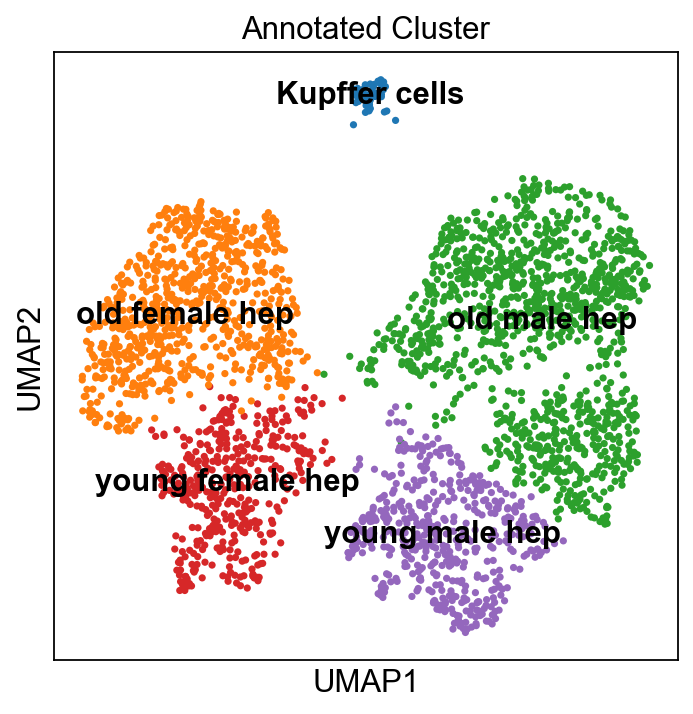

In [71]:
sc.pl.umap(liver_ss3, color = ['Annotated Cluster'],  legend_loc='on data',palette=colorblind_palette)


In [72]:
def annotate(row):
    cluster_id = int(row['leiden'])  
    
    age = 'O' if cluster_id not in [0, 2] else 'Y'
    
    sex = 'F' if cluster_id in [2, 3, 4] else 'M'
    
    if cluster_id == 7:
        cell_type = 'endothelial'
    elif cluster_id in [ 0, 3, 5]:
        cell_type = 'pericentral hep'
    elif cluster_id in [1, 2, 4, 6, 8]:
        cell_type = 'periportal hep'
    else:
        cell_type = 'hep'
    
    if cell_type == 'endothelial':
        return f'{cell_type} cells'
    else:
        return f'{age}{sex} {cell_type}'

In [73]:
liver_ss3.obs['CV & PV'] = liver_ss3.obs.apply(annotate, axis = 1)

In [74]:
liver_ss3.obs

CellID       Plate Index    Age  \
cellid                                                                          
AACGTACCGTTGCCTACGTC  ss3_full:AACGTACCGTTGCCTACGTCx  SP_Y_M2_p2   19J  Young   
AACTGCGCCATGGACGGAGT  ss3_full:AACTGCGCCATGGACGGAGTx  SP_Y_M1_p2   10G  Young   
AACGTACCGTGAATAGACCA  ss3_full:AACGTACCGTGAATAGACCAx     SP_2_p2   14J    Old   
AACGTACCGTGGAGATTGAA  ss3_full:AACGTACCGTGGAGATTGAAx     SP_2_p2   14J    Old   
AACGTACCGTCCGTATCATA  ss3_full:AACGTACCGTCCGTATCATAx  SP_Y_M2_p2   19J  Young   
...                                              ...         ...   ...    ...   
TTGTTACTCCTAAGTGCTCG  ss3_full:TTGTTACTCCTAAGTGCTCGx  SP_Y_F1_p3    7B  Young   
TTGTTACTCCTTGTGTCTTC  ss3_full:TTGTTACTCCTTGTGTCTTCx     SP_3_p2    3B    Old   
TTGTTACTCCGTGTTCCACG  ss3_full:TTGTTACTCCGTGTTCCACGx  SP_Y_F1_p3    7B  Young   
TTGTTCGGATCGCTTAATAC  ss3_full:TTGTTCGGATCGCTTAATACx       SP_34    7E    Old   
TTGTTCGGATTTCTGAGTCA  ss3_full:TTGTTCGGATTTCTGAGTCAx       SP_34    7E    Old   

                         Sex Replicate PlateN  n_genes  n_genes_by_counts  \
cellid                                                                      
AACGTACCGTTGCCTACGTC    Male       2.0     p2     2514               2513   
AACTGCGCCATGGACGGAGT    Male       1.0     p2     3421               3419   
AACGTACCGTGAATAGACCA  Female       2.0     p2     2949               2948   
AACGTACCGTGGAGATTGAA  Female       2.0     p2     1312               1312   
AACGTACCGTCCGTATCATA    Male       2.0     p2     6871               6839   
...                      ...       ...    ...      ...                ...   
TTGTTACTCCTAAGTGCTCG  Female       1.0     p3     4021               4015   
TTGTTACTCCTTGTGTCTTC    Male       1.0     p2     3275               3271   
TTGTTACTCCGTGTTCCACG  Female       1.0     p3     5820               5796   
TTGTTCGGATCGCTTAATAC    Male       2.0     p4     3706               3701   
TTGTTCGGATTTCTGAGTCA    Male       2.0     p4     4114               4109   

                      total_counts  total_counts_mt  pct_counts_mt leiden  \
cellid                                                                      
AACGTACCGTTGCCTACGTC       22719.0            992.0       4.366389      0   
AACTGCGCCATGGACGGAGT       39147.0           7553.0      19.293943      0   
AACGTACCGTGAATAGACCA       24865.0            890.0       3.579328      3   
AACGTACCGTGGAGATTGAA        5596.0            264.0       4.717656      3   
AACGTACCGTCCGTATCATA      116682.0          11986.0      10.272365      0   
...                            ...              ...            ...    ...   
TTGTTACTCCTAAGTGCTCG       36888.0           4544.0      12.318369      2   
TTGTTACTCCTTGTGTCTTC       24552.0           3328.0      13.554904      6   
TTGTTACTCCGTGTTCCACG       65542.0           5396.0       8.232888      2   
TTGTTCGGATCGCTTAATAC       27258.0           2186.0       8.019664      6   
TTGTTCGGATTTCTGAGTCA       40318.0           4158.0      10.313012      1   

                     Annotated Cluster             CV & PV  
cellid                                                      
AACGTACCGTTGCCTACGTC    young male hep  YM pericentral hep  
AACTGCGCCATGGACGGAGT    young male hep  YM pericentral hep  
AACGTACCGTGAATAGACCA    old female hep  OF pericentral hep  
AACGTACCGTGGAGATTGAA    old female hep  OF pericentral hep  
AACGTACCGTCCGTATCATA    young male hep  YM pericentral hep  
...                                ...                 ...  
TTGTTACTCCTAAGTGCTCG  young female hep   YF periportal hep  
TTGTTACTCCTTGTGTCTTC      old male hep   OM periportal hep  
TTGTTACTCCGTGTTCCACG  young female hep   YF periportal hep  
TTGTTCGGATCGCTTAATAC      old male hep   OM periportal hep  
TTGTTCGGATTTCTGAGTCA      old male hep   OM periportal hep  

[2847 rows x 15 columns]

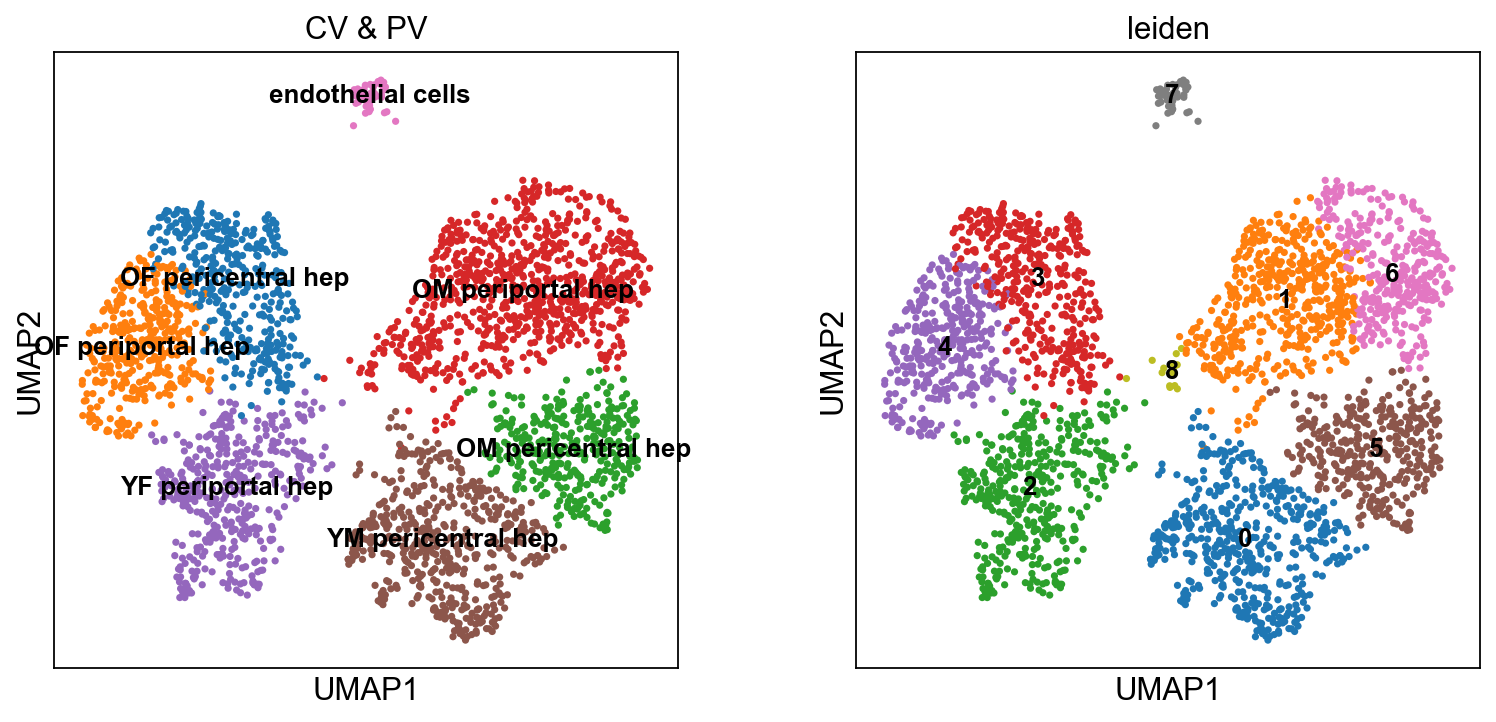

In [75]:
sc.pl.umap(liver_ss3, color=['CV & PV', "leiden"], palette=colorblind_palette, legend_loc='on data', legend_fontsize='small')


In [76]:
def combine_annotations(row):
    return f"{row['leiden']}_{row['CV & PV']}"

In [77]:
liver_ss3.obs['combined_annotation'] = liver_ss3.obs.apply(combine_annotations, axis=1)

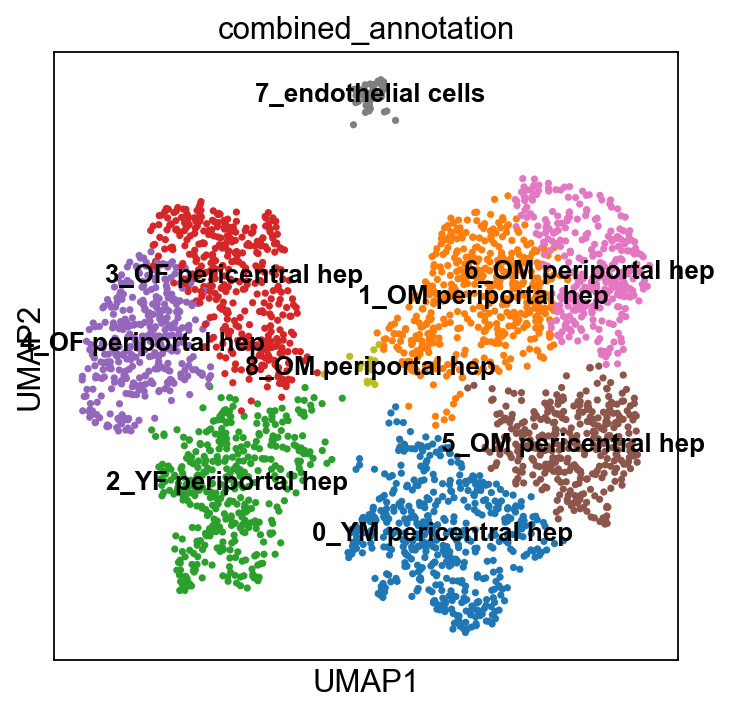

In [78]:
sc.pl.umap(liver_ss3, color='combined_annotation', palette=colorblind_palette, legend_loc='on data', legend_fontsize='small')

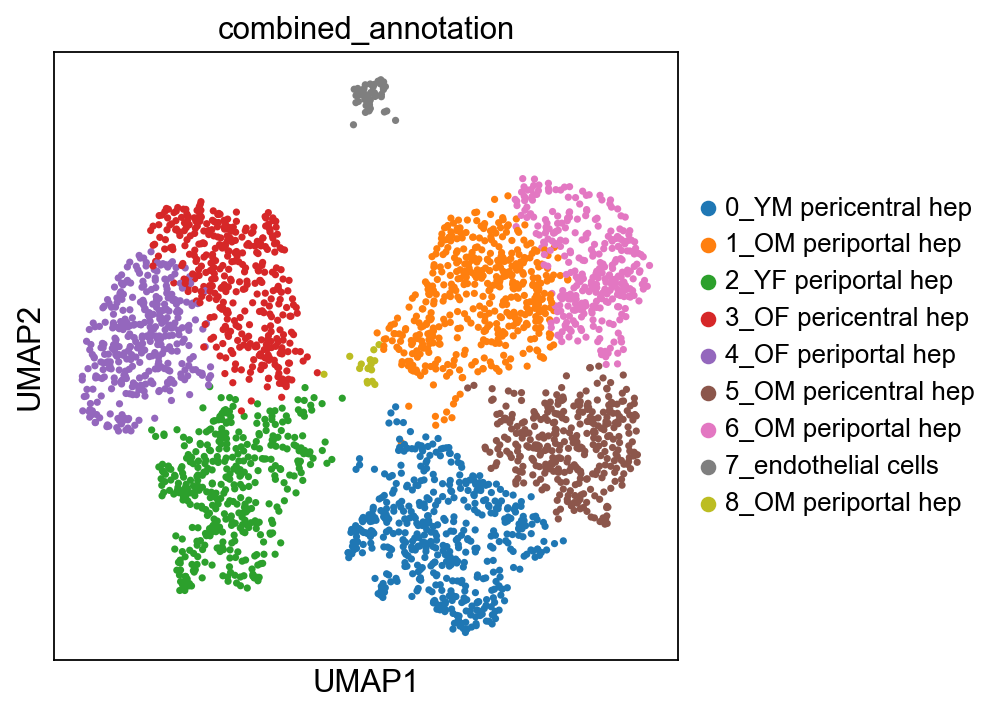

In [79]:
sc.pl.umap(liver_ss3, color='combined_annotation', palette=colorblind_palette, legend_fontsize='small')

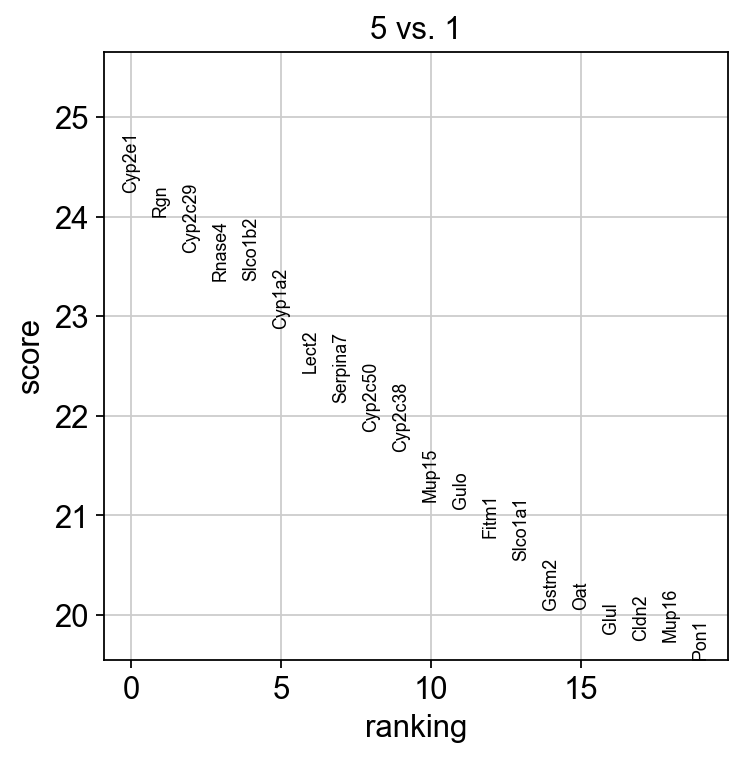

In [81]:
sc.tl.rank_genes_groups(liver_ss3, 'leiden', groups=['5'], reference='1', method='wilcoxon')
sc.pl.rank_genes_groups(liver_ss3, groups=['5'], n_genes=20)

In [ ]:
from bioinfokit import analys, visuz
DE_results = liver_ss3.uns['rank_genes_groups']

group = liver_ss3[liver_ss3.obs['leiden'] == 5]
reference = liver_ss3[liver_ss3.obs['leiden'] == 1] 

#logfoldchanges = pd.to_numeric(DE_results['logfoldchanges'][group], errors='coerce')
#pvals_adj = pd.to_numeric(DE_results['pvals_adj'][group], errors='coerce')
#genes = DE_results['names'][group]

DE_df = pd.DataFrame({
    'genes': DE_results['names'][group],
    'logfoldchanges': DE_results['logfoldchanges'][group],
    'pvals_adj': DE_results['pvals_adj'][group]
})

#de_df = DE_df.dropna()
de_df = DE_df.sort_values(by='logfoldchanges', ascending=False) 

visuz.GeneExpression.ma(df=de_df, lfc='logfoldchanges', pv='pvals_adj', genenames='genes', 
                        show=True, signif_line=True, lfc_thr=(2, -2), pv_thr=0.05)

In [ ]:
sc.tl.rank_genes_groups(liver_ss3, 'leiden', groups=['5'], reference='6', method='wilcoxon')
sc.pl.rank_genes_groups(liver_ss3, groups=['5'], n_genes=20)

In [ ]:
sc.tl.rank_genes_groups(liver_ss3, 'leiden', groups=['5'], reference='8', method='wilcoxon')
sc.pl.rank_genes_groups(liver_ss3, groups=['5'], n_genes=20)

In [ ]:
sc.tl.rank_genes_groups(liver_ss3, 'leiden', groups=['4'], reference='3', method='wilcoxon')
sc.pl.rank_genes_groups(liver_ss3, groups=['4'], n_genes=20)

In [ ]:
sc.tl.rank_genes_groups(liver_ss3, 'leiden', groups=['3'], reference='4', method='wilcoxon')
sc.pl.rank_genes_groups(liver_ss3, groups=['3'], n_genes=20)